In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = "0"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
#import libraries and some constants

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
import pandas as pd
import uproot as ur
import atlas_mpl_style as ampl
ampl.use_atlas_style()

params = {'legend.fontsize': 13,
          'axes.labelsize': 18}
plt.rcParams.update(params)

path_prefix = '/AL/Phd/maxml/caloml-atlas/'

# metadata
layers = ["EMB1", "EMB2", "EMB3", "TileBar0", "TileBar1", "TileBar2"]
cell_size_phi = [0.098, 0.0245, 0.0245, 0.1, 0.1, 0.1]
cell_size_eta = [0.0031, 0.025, 0.05, 0.1, 0.1, 0.2]
len_phi = [4, 16, 16, 4, 4, 4]
len_eta = [128, 16, 8, 4, 4, 2]

In [54]:
# import our resolution utilities

import sys
sys.path.append(path_prefix)
sys.path
import resolution_util as ru
import plot_util as pu
import ml_util as mu

inputpath = '/fast_scratch/atlas_images/v7/'
branches = ['runNumber', 'eventNumber', 'truthE', 'truthPt', 'truthEta', 'truthPhi', 'clusterIndex', 'nCluster', 'clusterE', 'clusterECalib', 'clusterPt', 'clusterEta', 'clusterPhi', 'cluster_nCells', 'cluster_sumCellE', 'cluster_ENG_CALIB_TOT', 'cluster_ENG_CALIB_OUT_T', 'cluster_ENG_CALIB_DEAD_TOT', 'cluster_EM_PROBABILITY', 'cluster_HAD_WEIGHT', 'cluster_OOC_WEIGHT', 'cluster_DM_WEIGHT', 'cluster_CENTER_MAG', 'cluster_FIRST_ENG_DENS', 'cluster_cell_dR_min', 'cluster_cell_dR_max', 'cluster_cell_dEta_min', 'cluster_cell_dEta_max', 'cluster_cell_dPhi_min', 'cluster_cell_dPhi_max', 'cluster_cell_centerCellEta', 'cluster_cell_centerCellPhi', 'cluster_cell_centerCellLayer', 'cluster_cellE_norm']
rootfiles = ["pi0", "piplus", "piminus"]
trees = {rfile : ur.open(inputpath+rfile+".root")['ClusterTree'] for rfile in rootfiles}
pdata = {ifile : pd.DataFrame(itree.arrays(expressions = branches, library='np')) for ifile, itree in trees.items()}
#so the above two are just defining new dictionaries using other dictionaries lol

#and these are just referencing the items in the dictionary
np0 = len(pdata['pi0'])
npp = len(pdata['piplus'])
npm = len(pdata['piminus'])
np0, npp, npm

(263891, 435967, 434627)

In [26]:
for i, j in trees.items():
    print(j.arrays(expressions=branches, library='np'))

SyntaxError: unexpected EOF while parsing (<ipython-input-26-2e643cfd7972>, line 2)

In [4]:
cell_shapes = {'EMB1': (128,4), 'EMB2': (16,16), 'EMB3': (8,16), 'TileBar0': (4,4), 'TileBar1': (4,4), 'TileBar2': (2,4)}
#nested dictionary definitions
pcells = {ifile : {layer : mu.setupCells(itree, layer) for layer in layers} for ifile, itree in trees.items()}

In [30]:
pcells['pi0']['EMB1']#so pcells is a nested dictionary pion type -> cal type

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
for i, j in pcells.items():
    print(i,'\n',j)

pi0 
 {'EMB1': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 'EMB2': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 'EMB3': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 'TileBar0': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..

In [47]:
for ptype, pcell in pcells.items():
    print(ptype)
    print(len(pcell[layers[0]])) #pi0, pi+, pi- numbers verified
    for layer in layers:
        print(layer)
        print('max',max(np.ndarray.flatten(pcell[layer])))
        print('min',min(np.ndarray.flatten(pcell[layer])))
        print('mean',np.mean(np.ndarray.flatten(pcell[layer])))#okay i see why the colourbars can't be standardized now..
#also based on this it seems that EMB1 has the highest counts for all three?

pi0
263891
EMB1
max 5.1721935
min 0.0
mean 0.0006095005
EMB2
max 0.9961983
min 0.0
mean 0.0023333936
EMB3
max 1.0
min 0.0
mean 9.6364776e-05
TileBar0
max 1.0319604
min 0.0
mean 0.0008318732
TileBar1
max 1.0148273
min 0.0
mean 0.00029088178
TileBar2
max 1.0417513
min 0.0
mean 8.678724e-05
piplus
435967
EMB1
max 91.56482
min 0.0
mean 0.0002306665
EMB2
max 1.258368
min 0.0
mean 0.0011734079
EMB3
max 1.0934618
min 0.0
mean 0.0004861749
TileBar0
max 1.0561858
min 0.0
mean 0.013208283
TileBar1
max 1.2026758
min 0.0
mean 0.0125927
TileBar2
max 1.2246107
min 0.0
mean 0.005428336
piminus
434627
EMB1
max 49.793232
min 0.0
mean 0.00022939403
EMB2
max 1.0
min 0.0
mean 0.0011656135
EMB3
max 1.0806948
min 0.0
mean 0.0004922129
TileBar0
max 1.0577381
min 0.0
mean 0.013256306
TileBar1
max 1.1221321
min 0.0
mean 0.012615319
TileBar2
max 1.2886943
min 0.0
mean 0.005485874


In [41]:
pcell[layers[0]]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<Figure size 799.992x599.976 with 0 Axes>

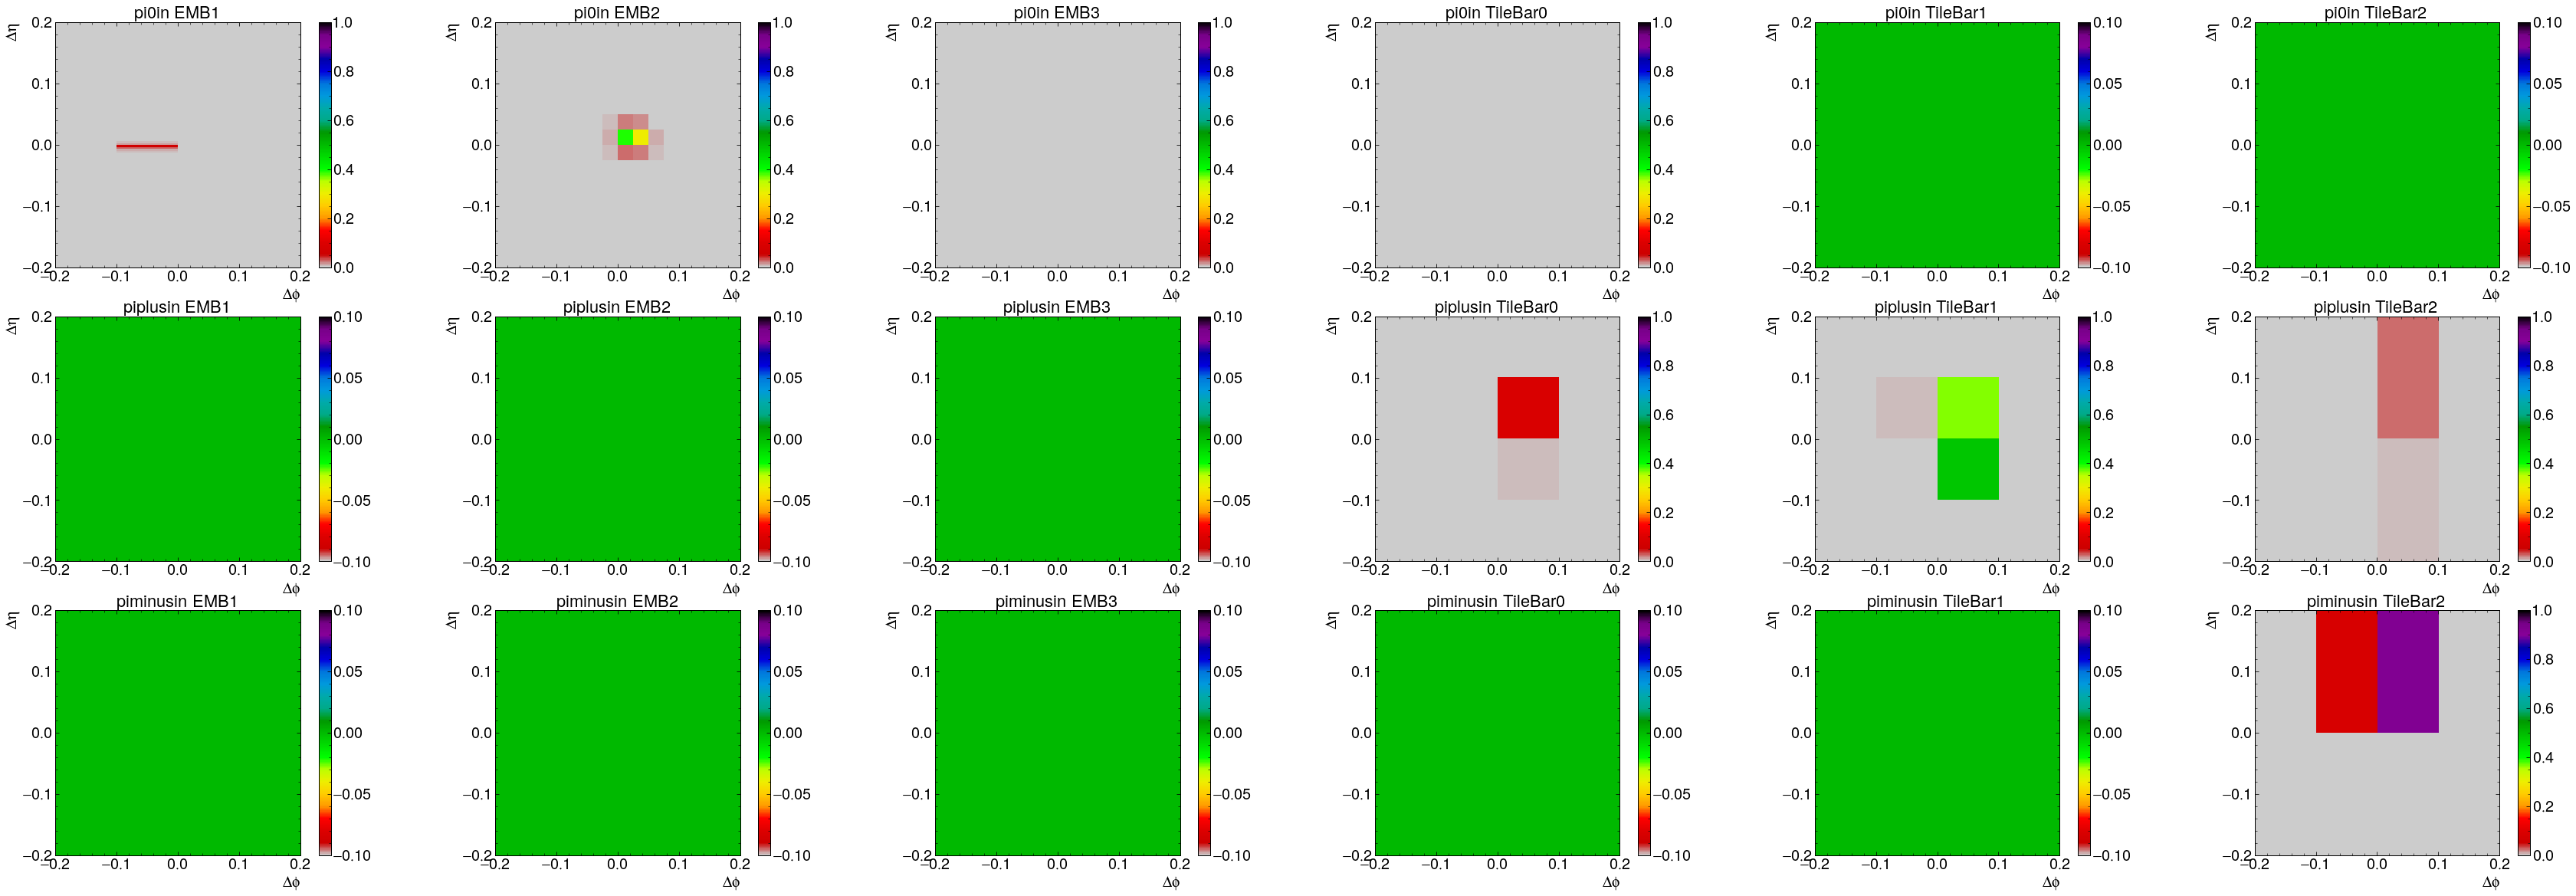

<Figure size 799.992x599.976 with 0 Axes>

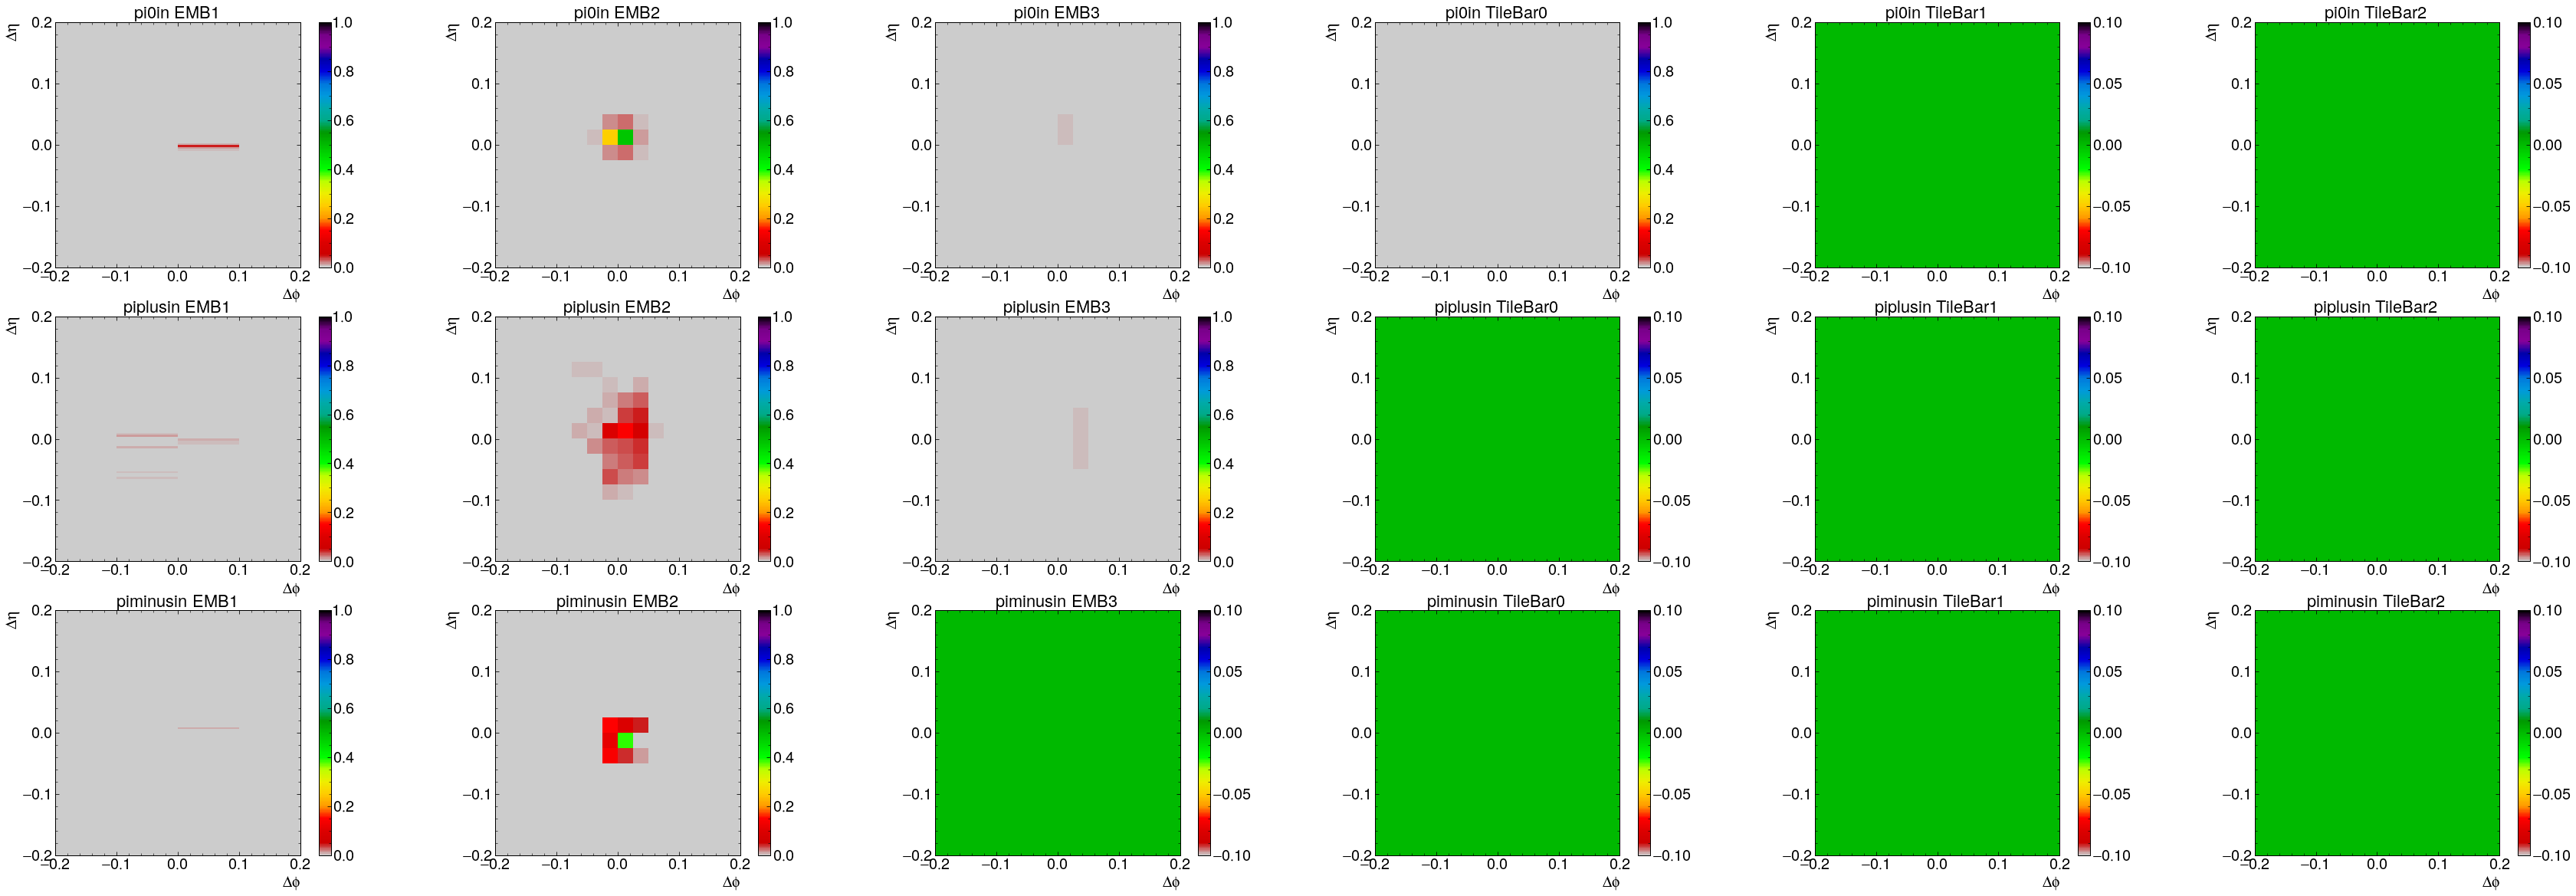

<Figure size 799.992x599.976 with 0 Axes>

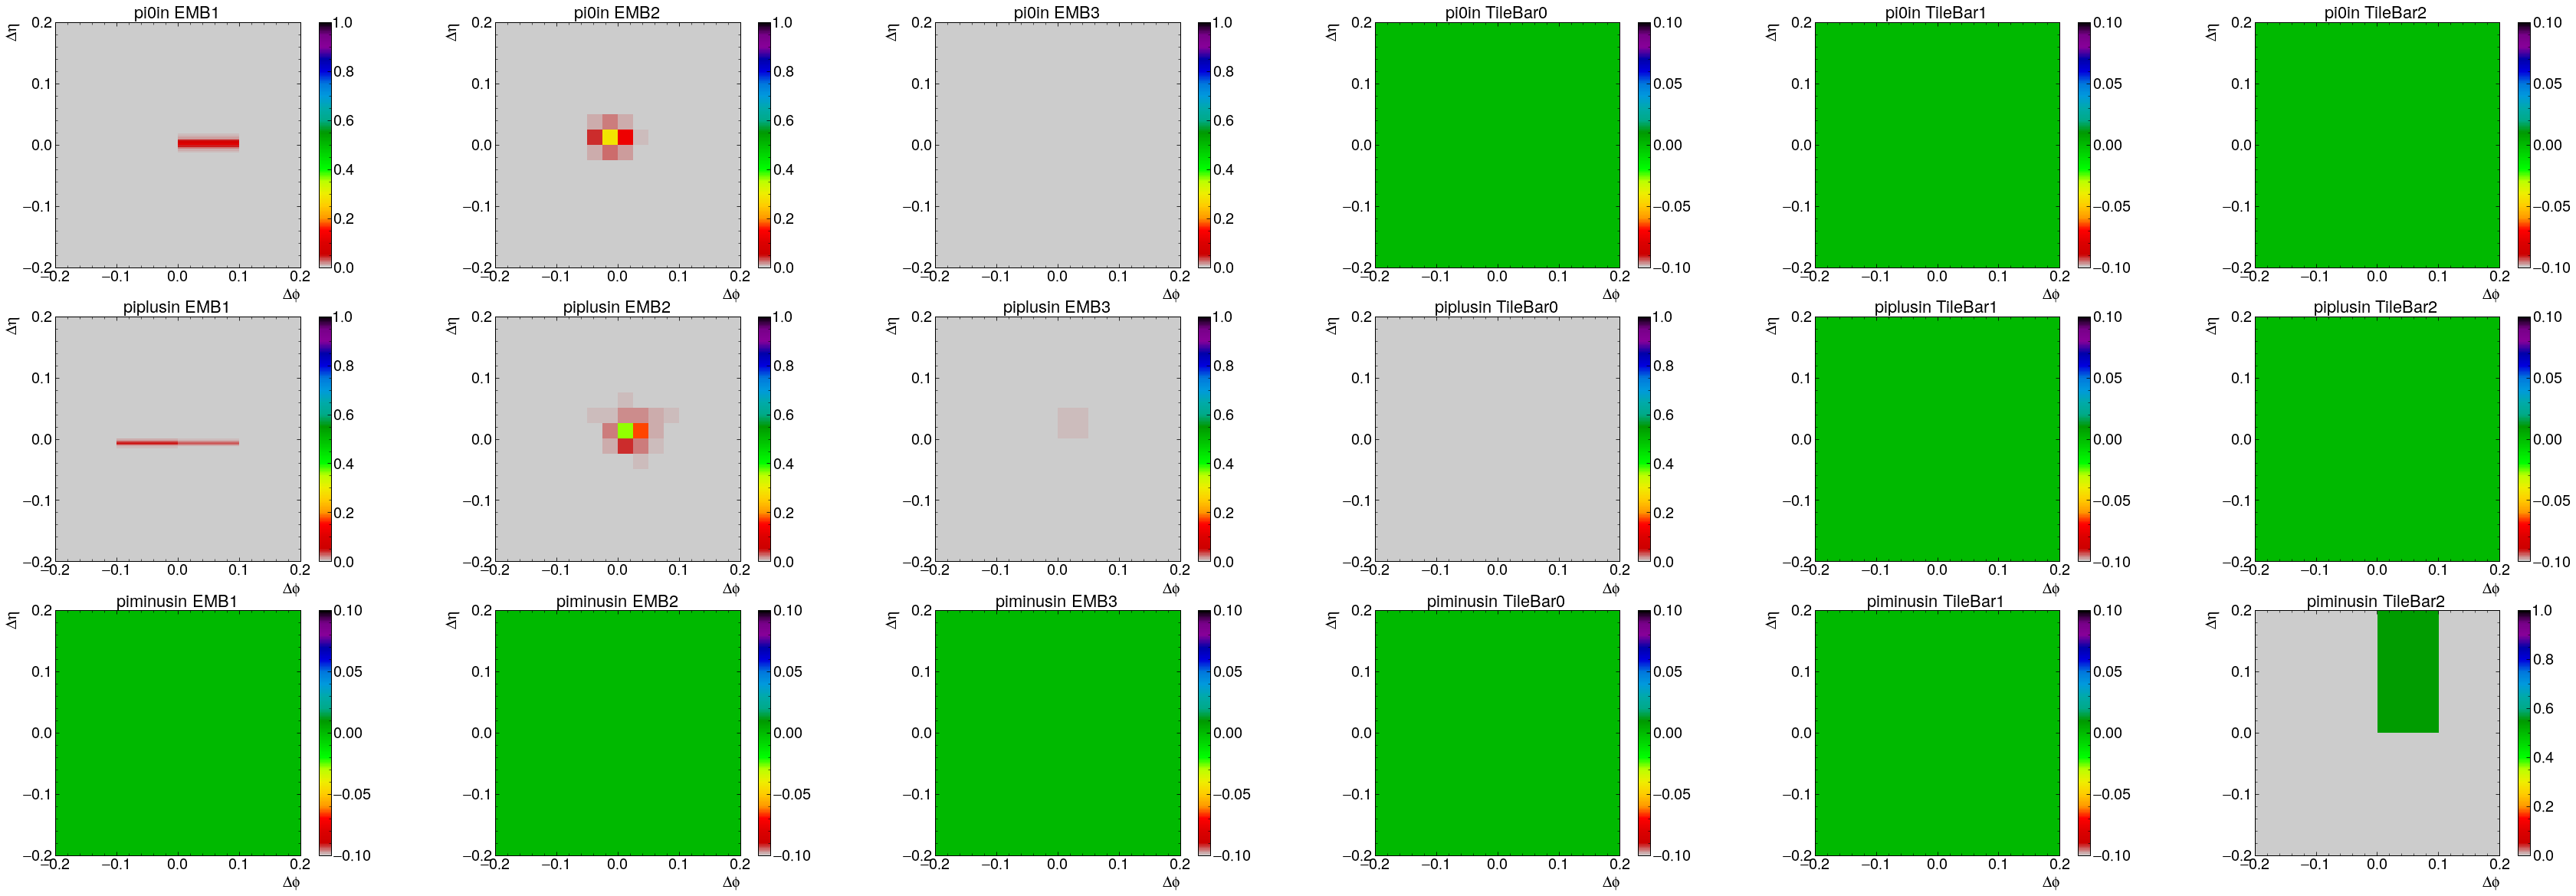

<Figure size 799.992x599.976 with 0 Axes>

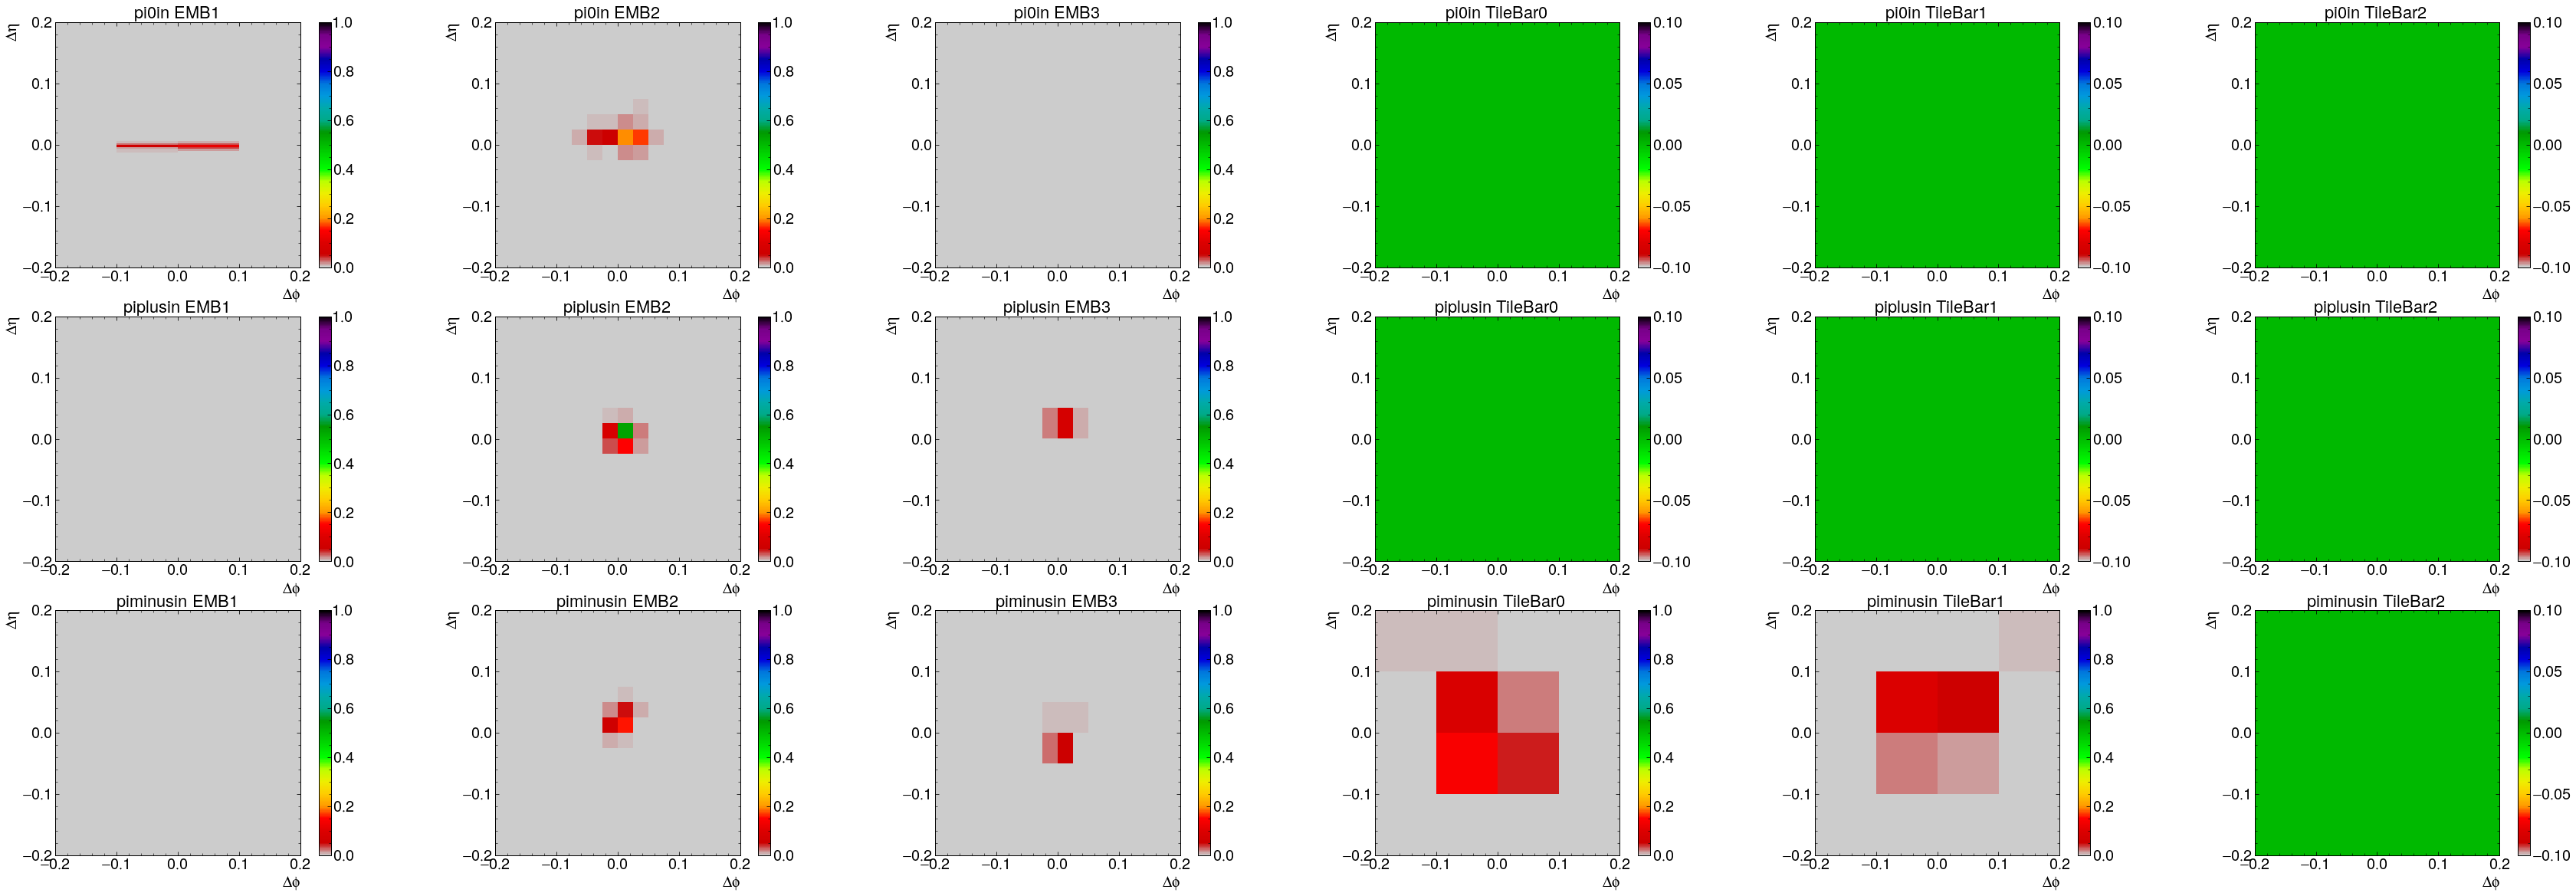

<Figure size 799.992x599.976 with 0 Axes>

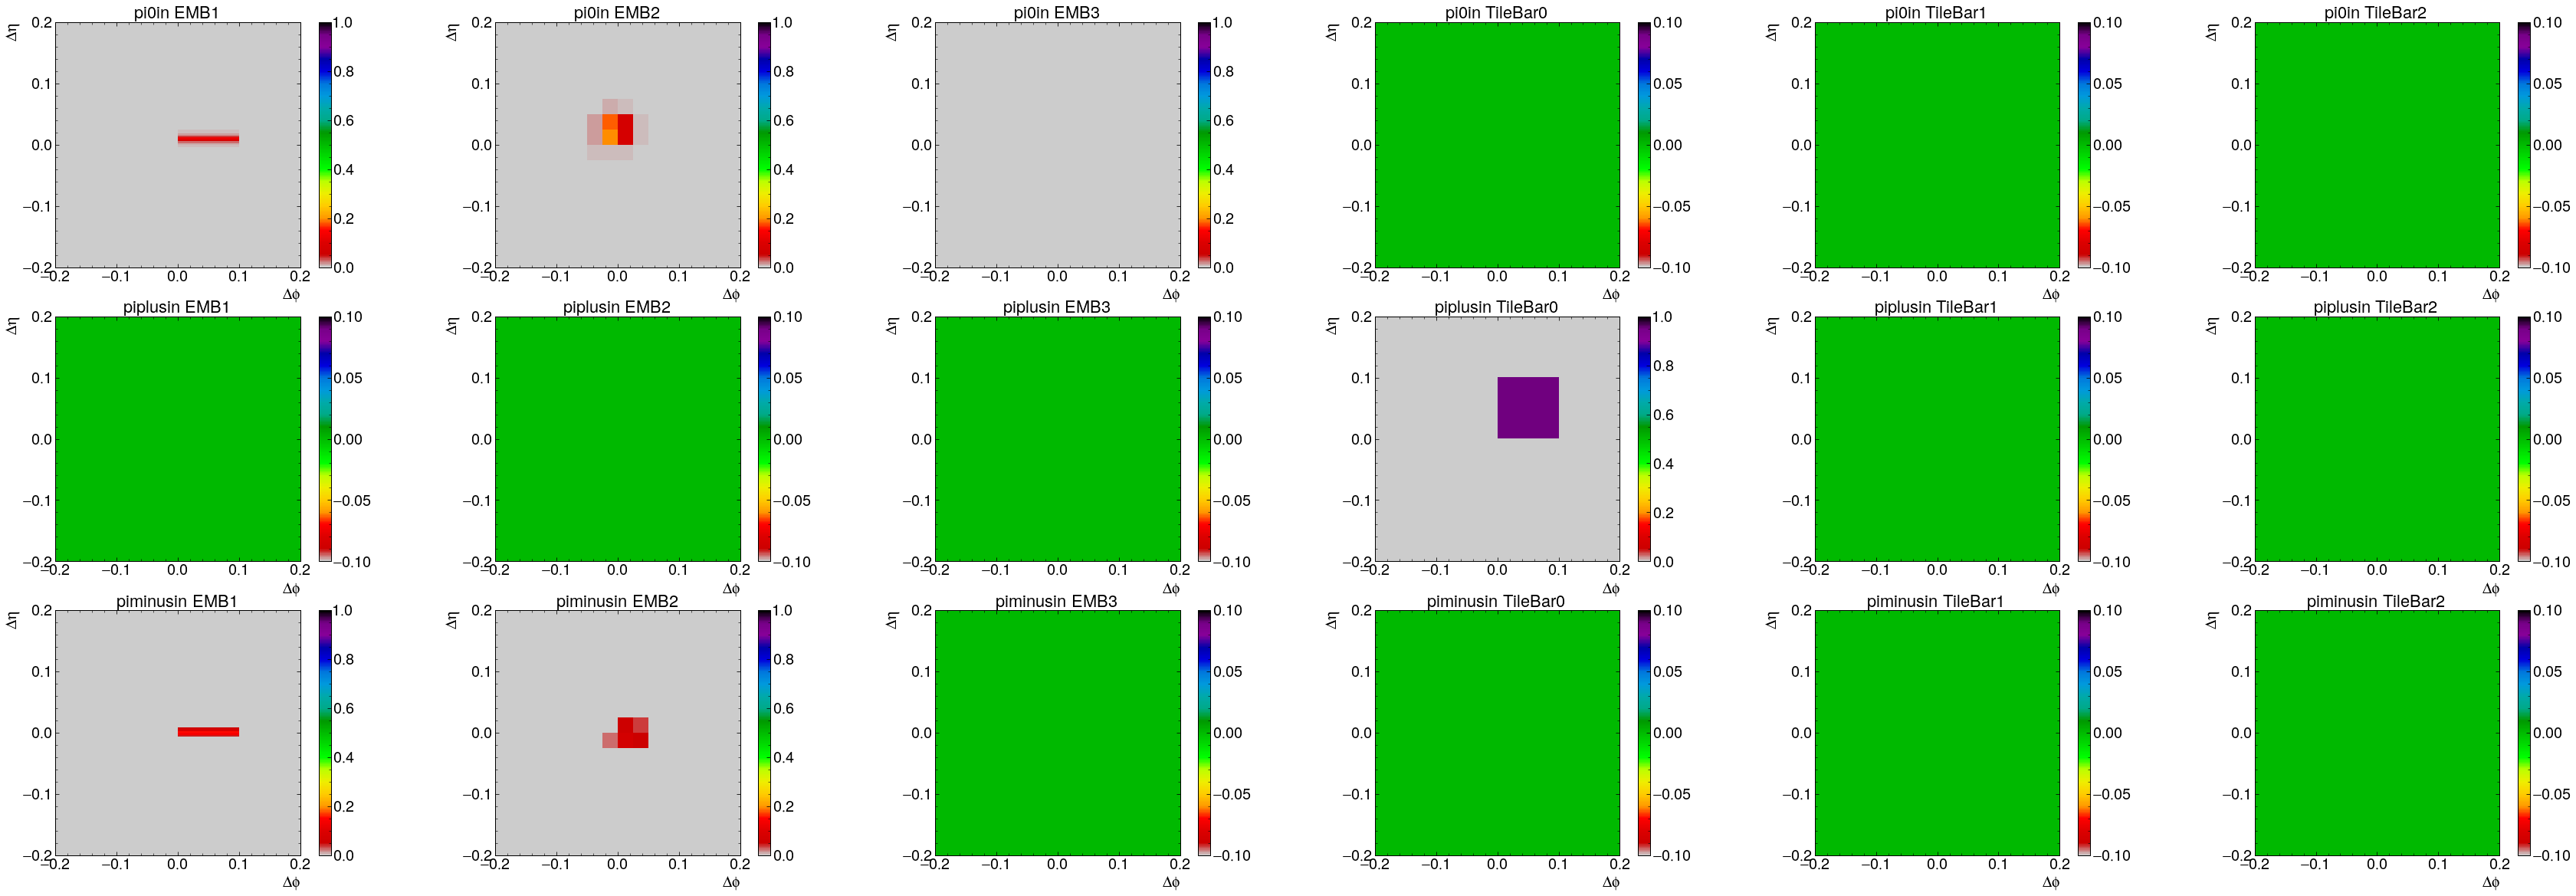

<Figure size 799.992x599.976 with 0 Axes>

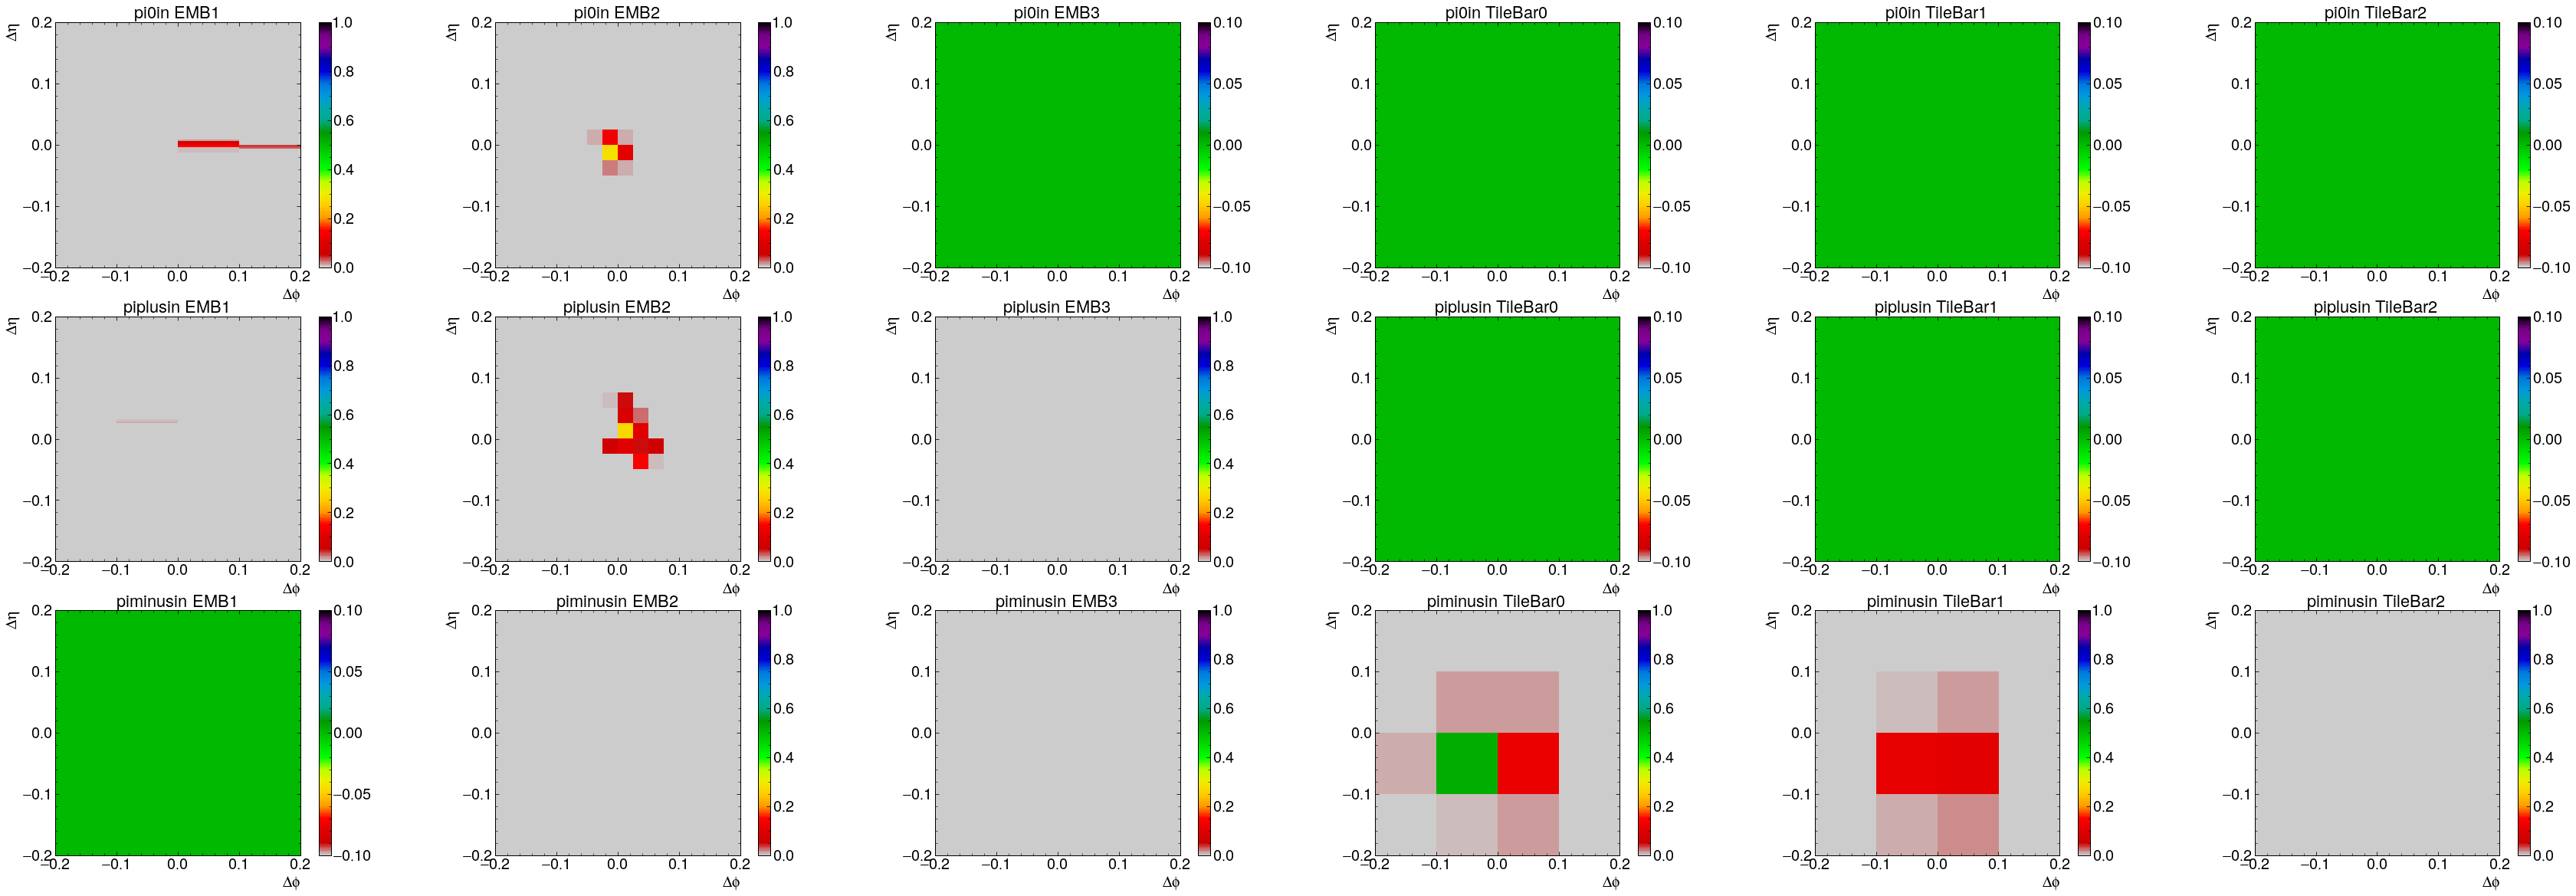

<Figure size 799.992x599.976 with 0 Axes>

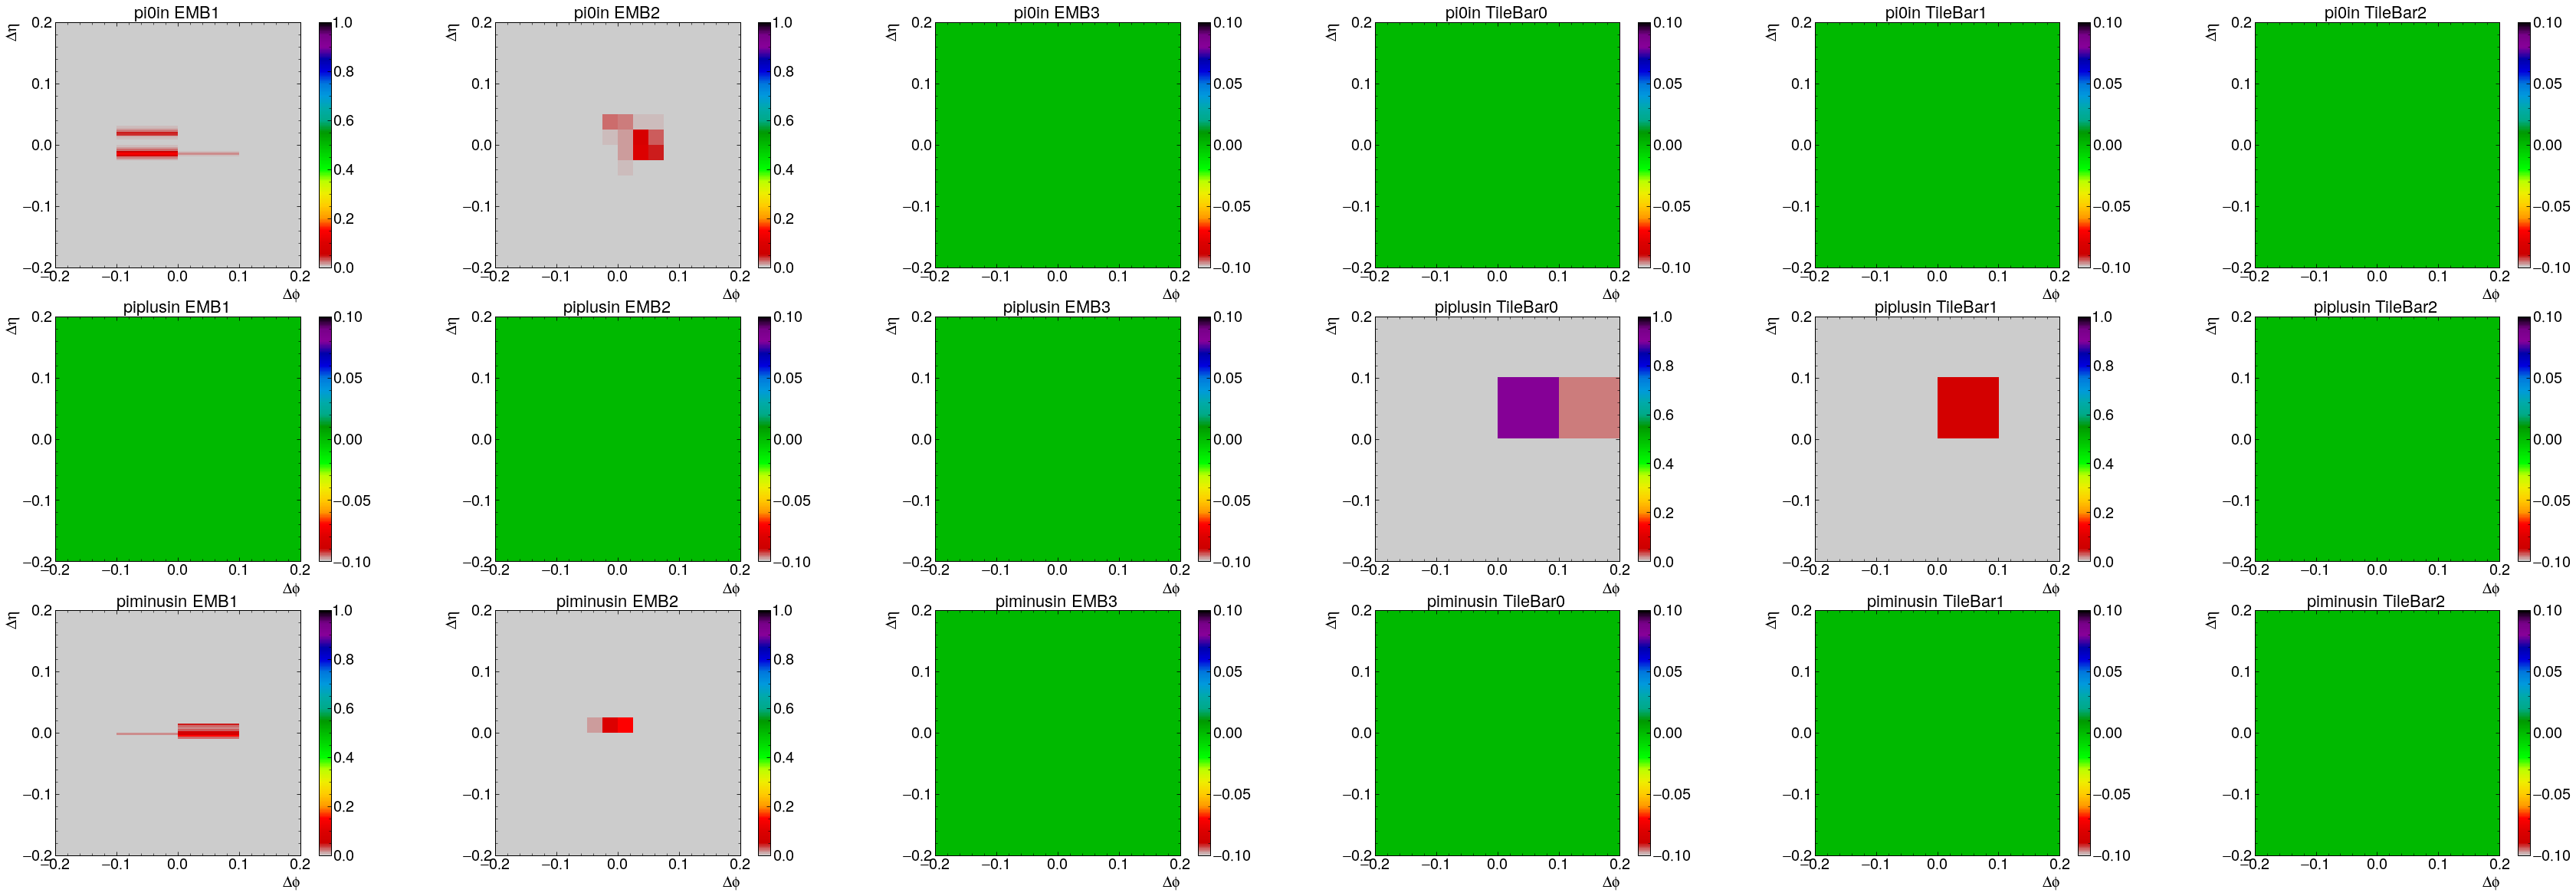

<Figure size 799.992x599.976 with 0 Axes>

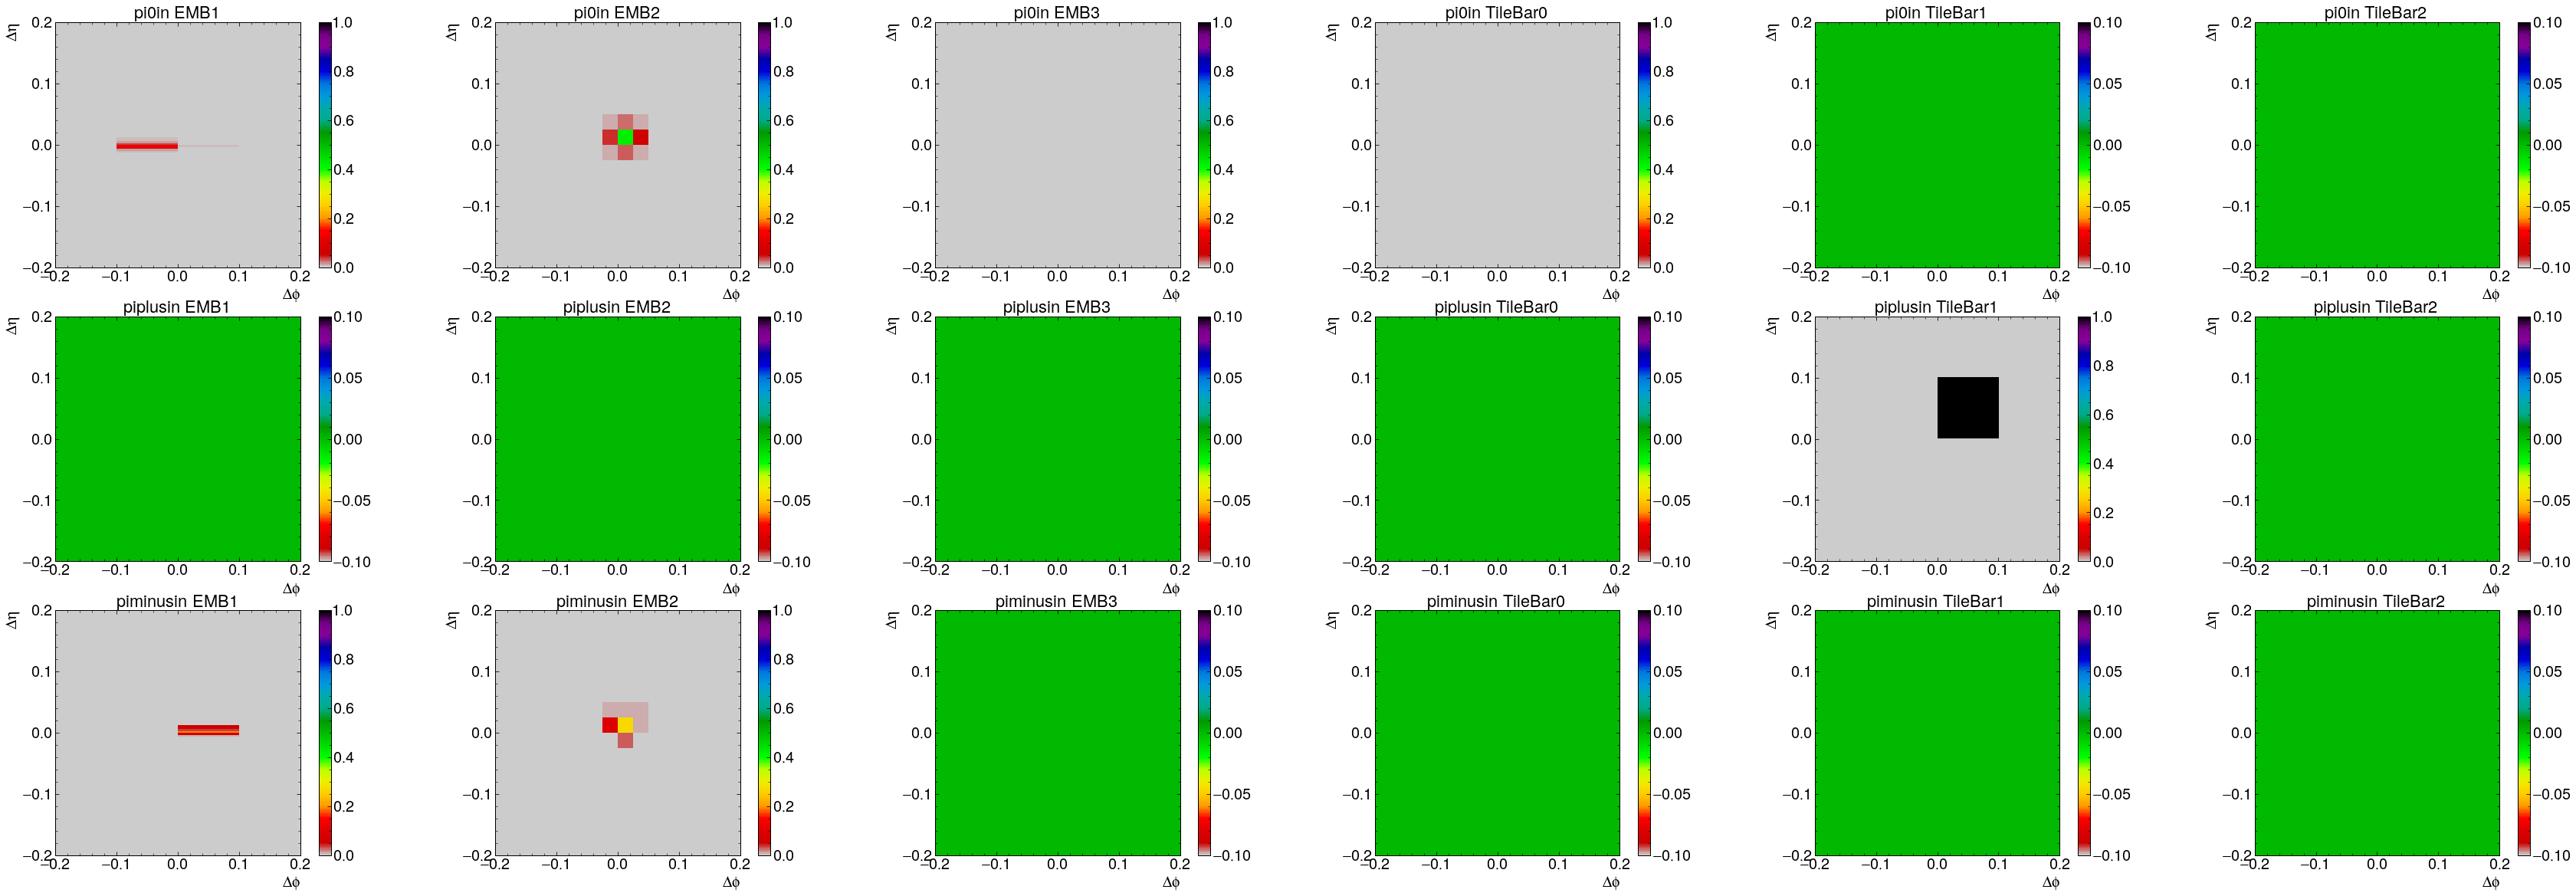

<Figure size 799.992x599.976 with 0 Axes>

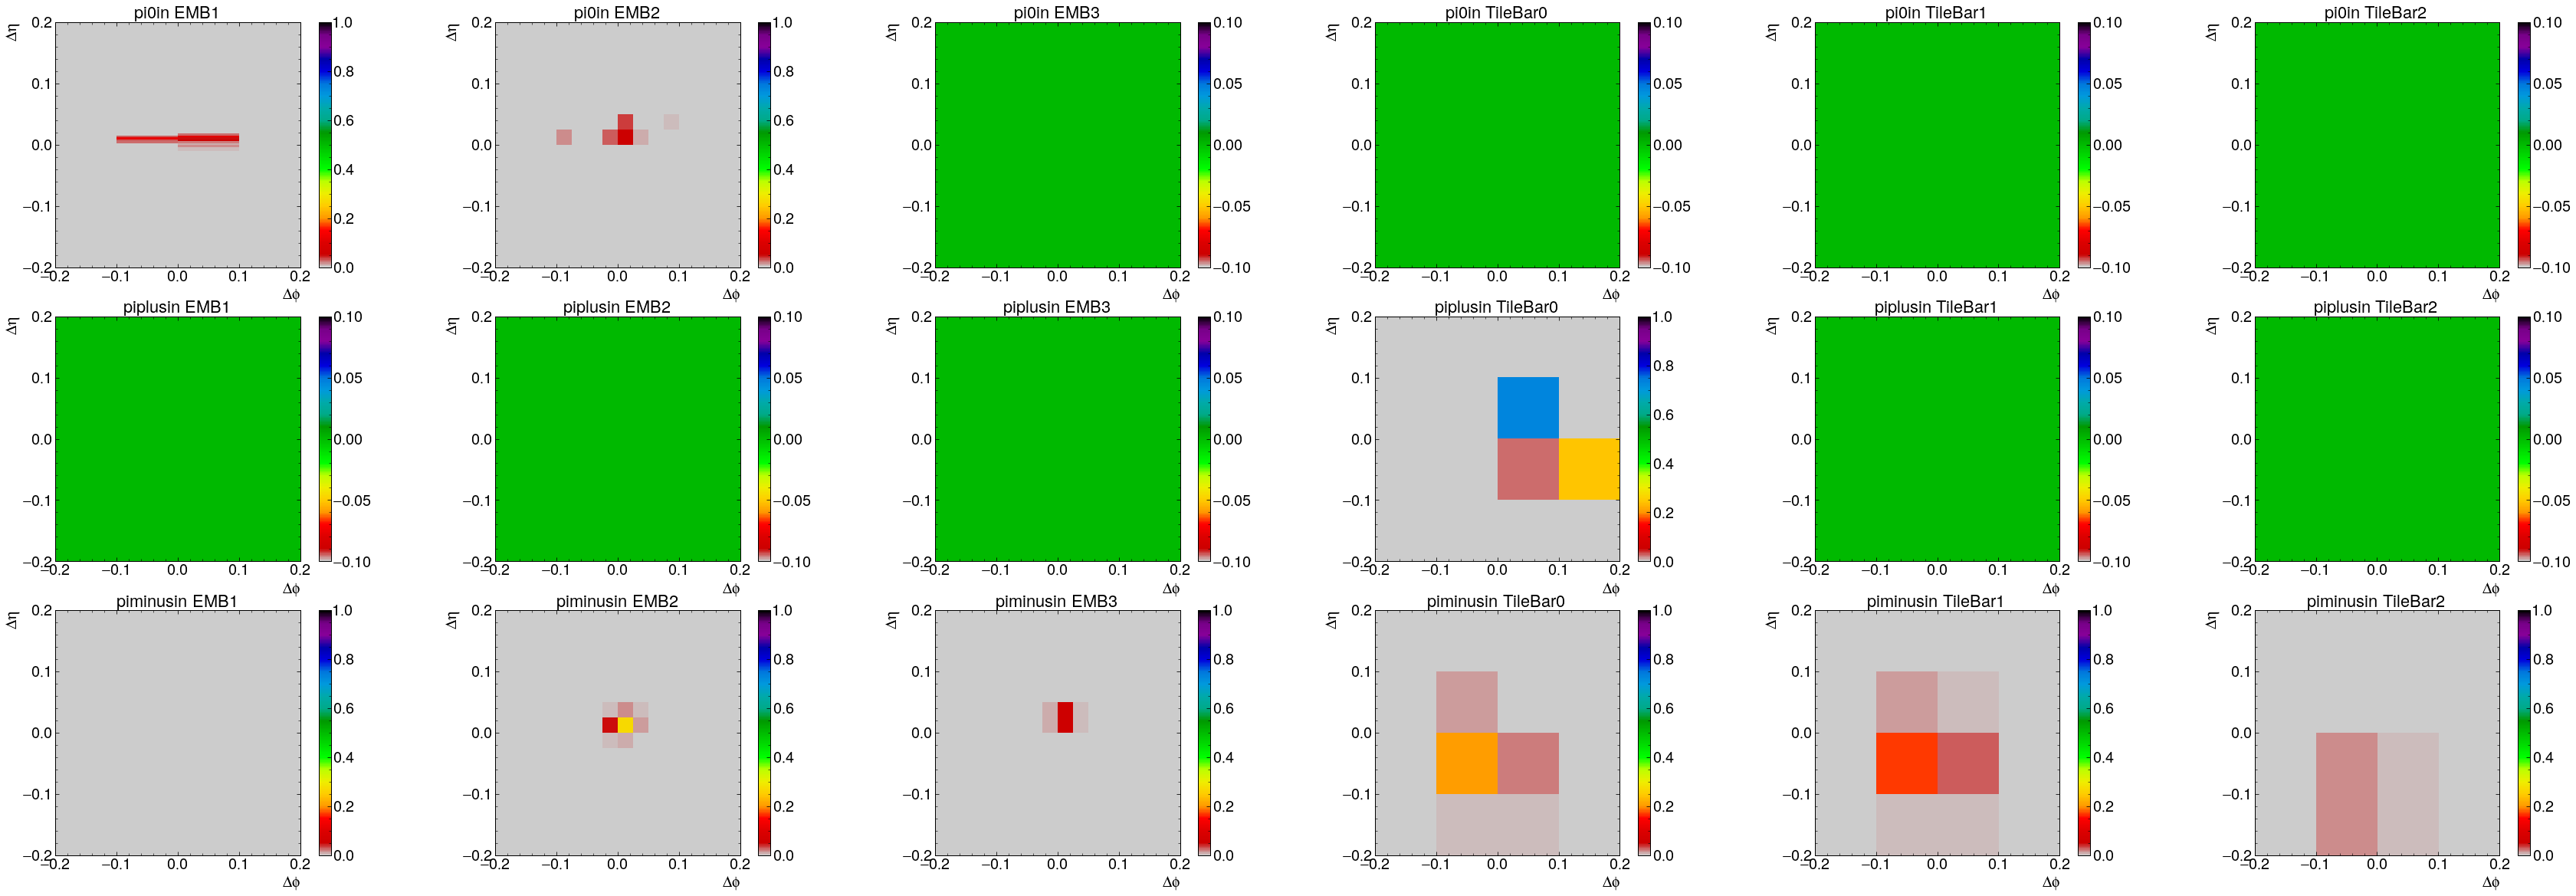

<Figure size 799.992x599.976 with 0 Axes>

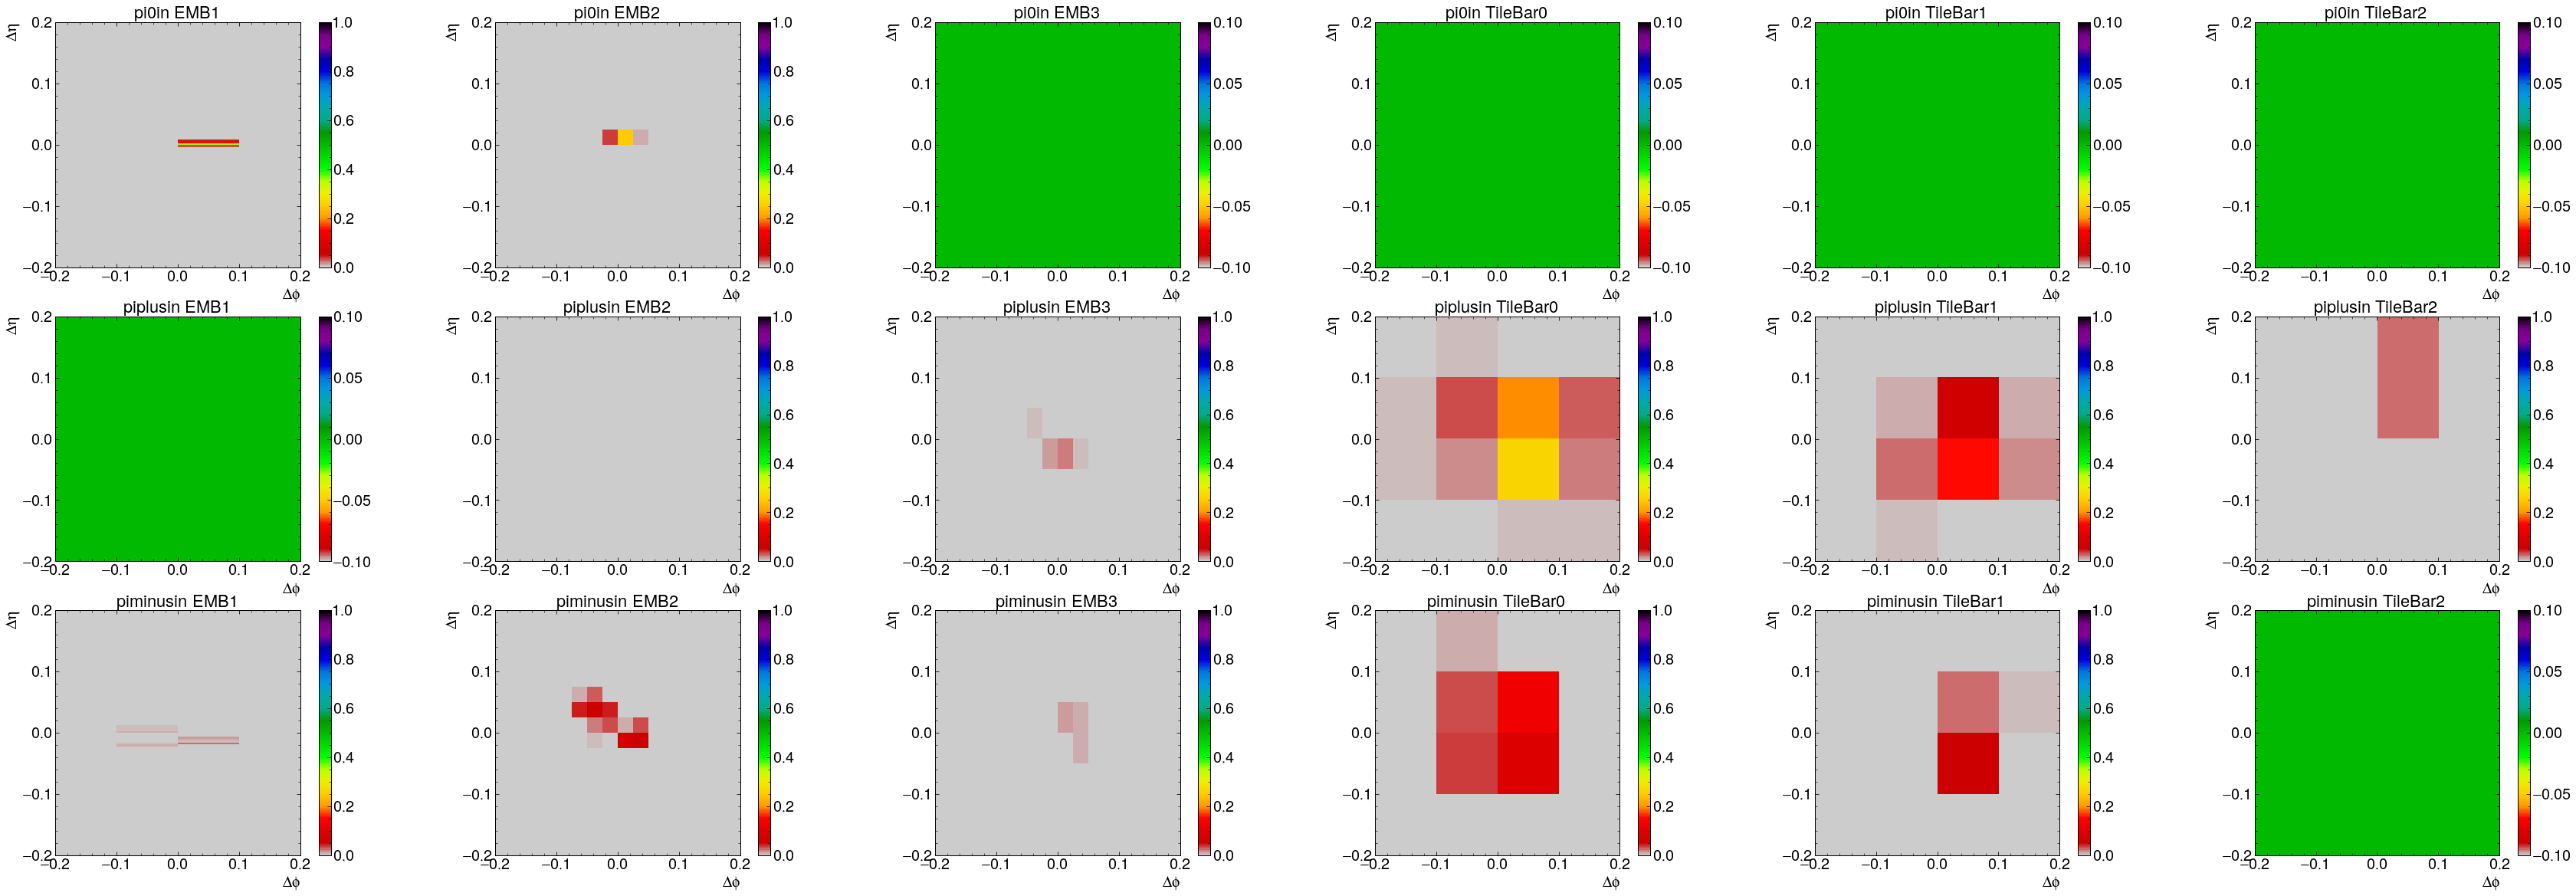

<Figure size 799.992x599.976 with 0 Axes>

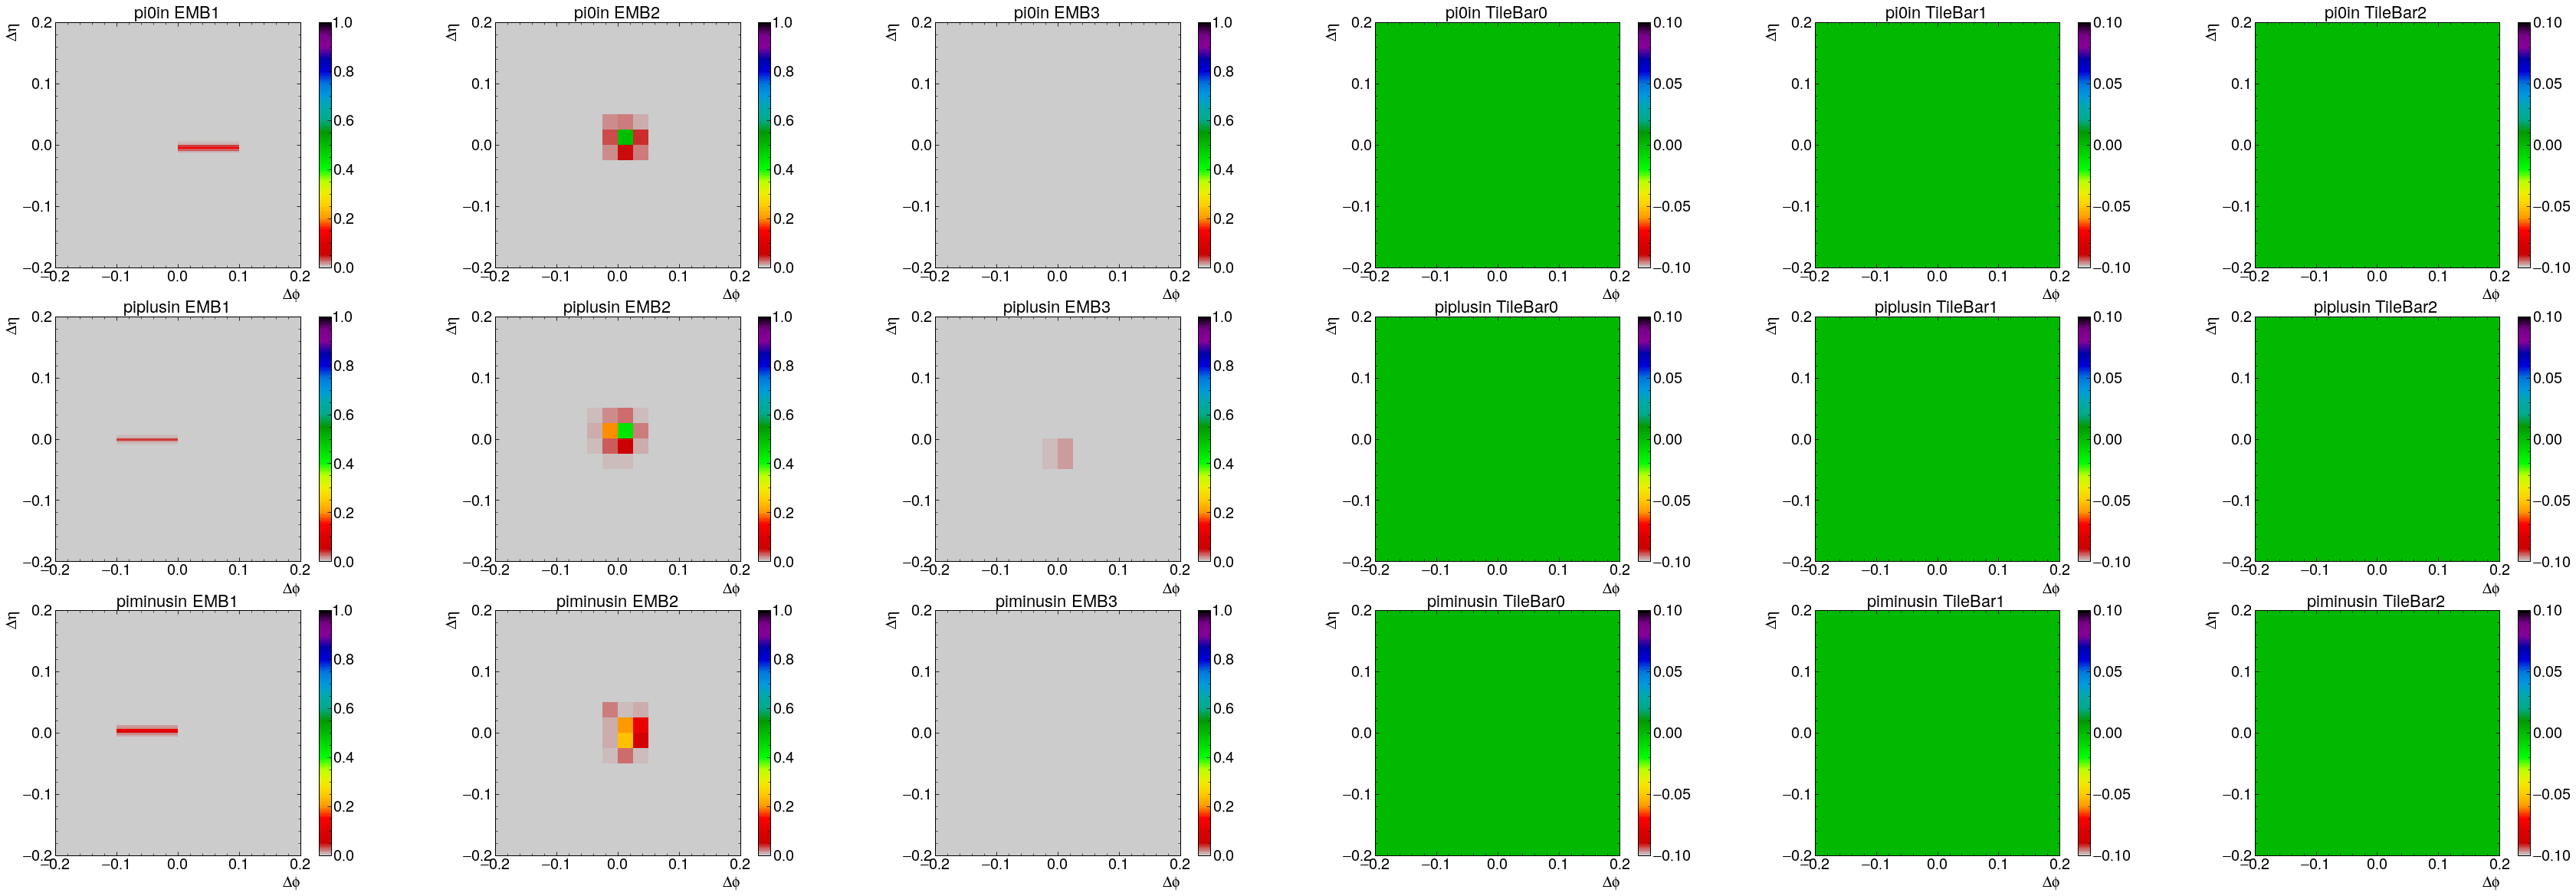

<Figure size 799.992x599.976 with 0 Axes>

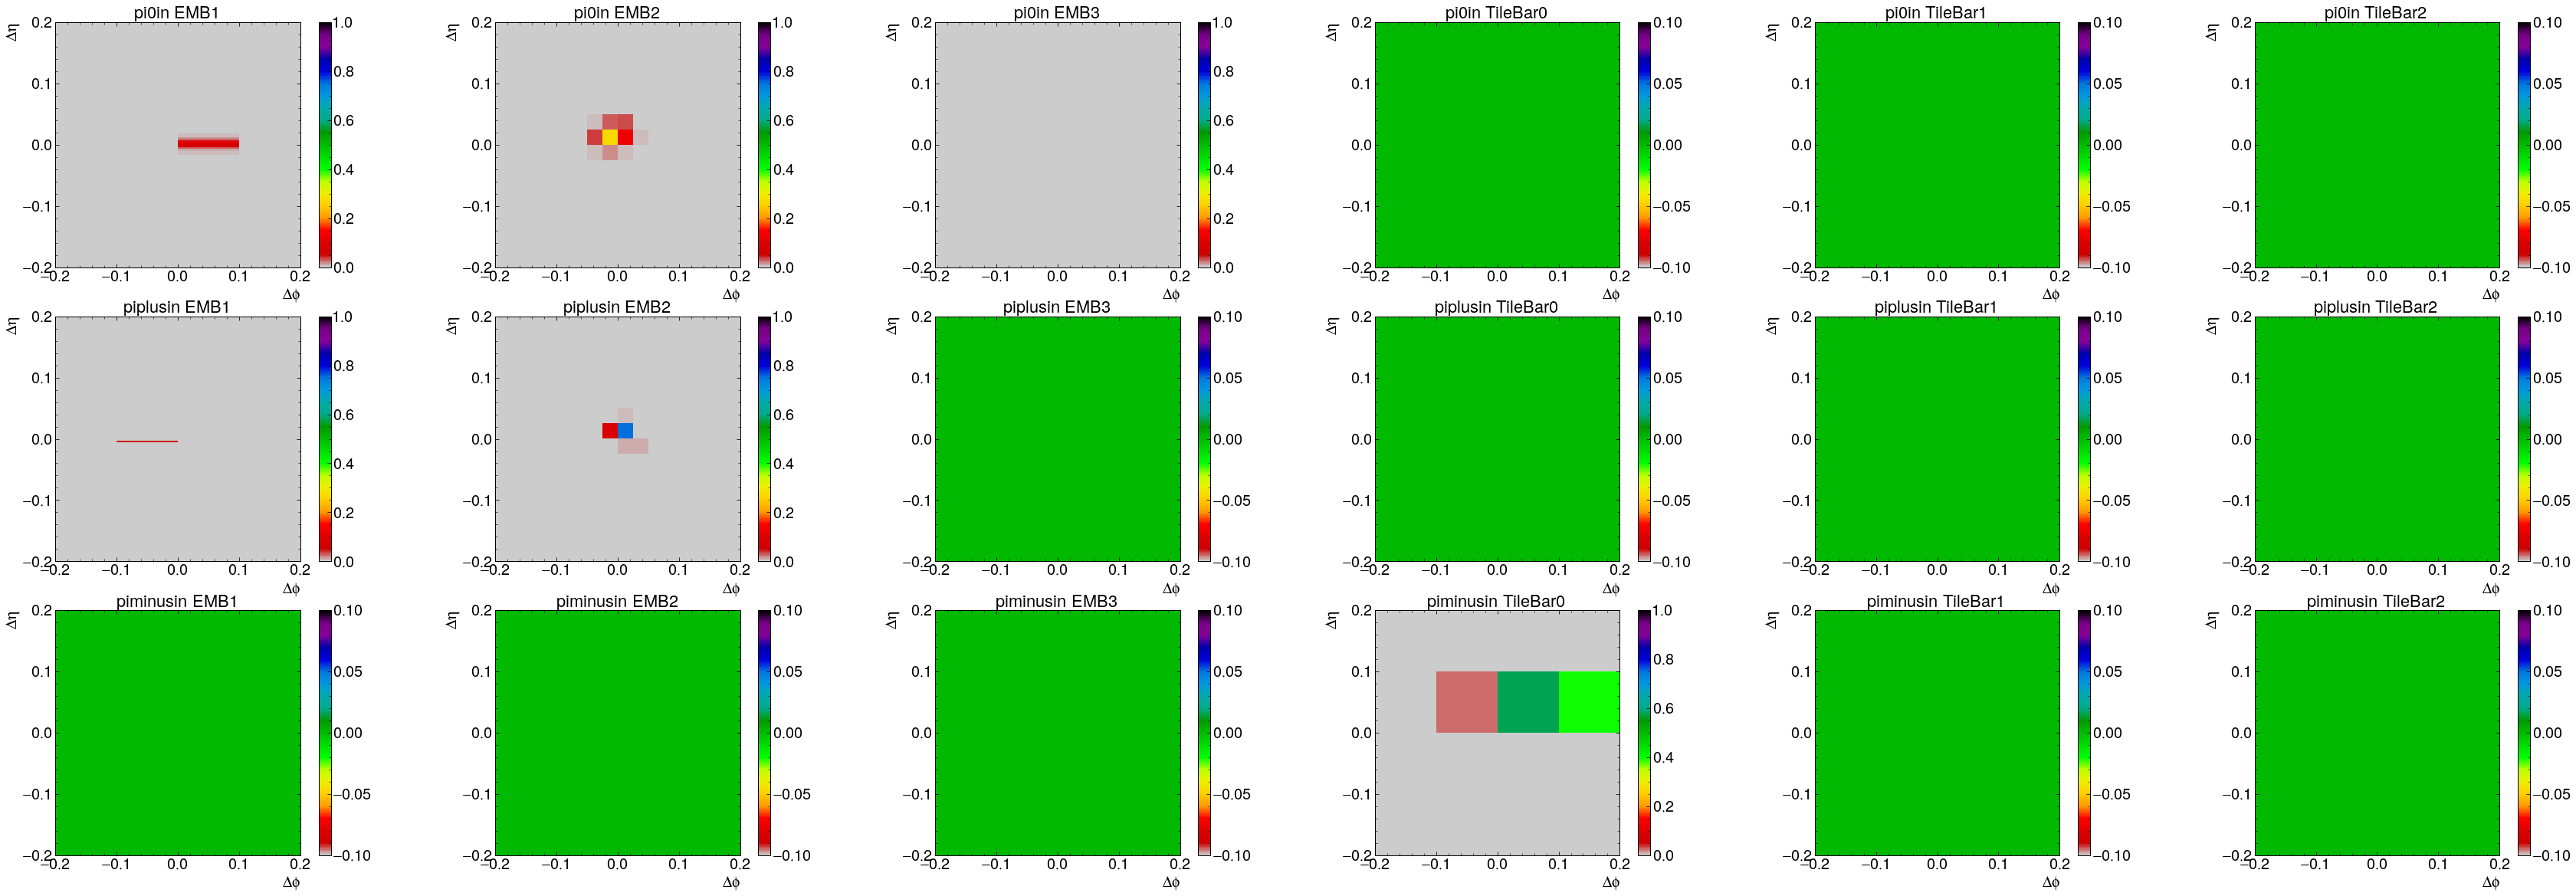

<Figure size 799.992x599.976 with 0 Axes>

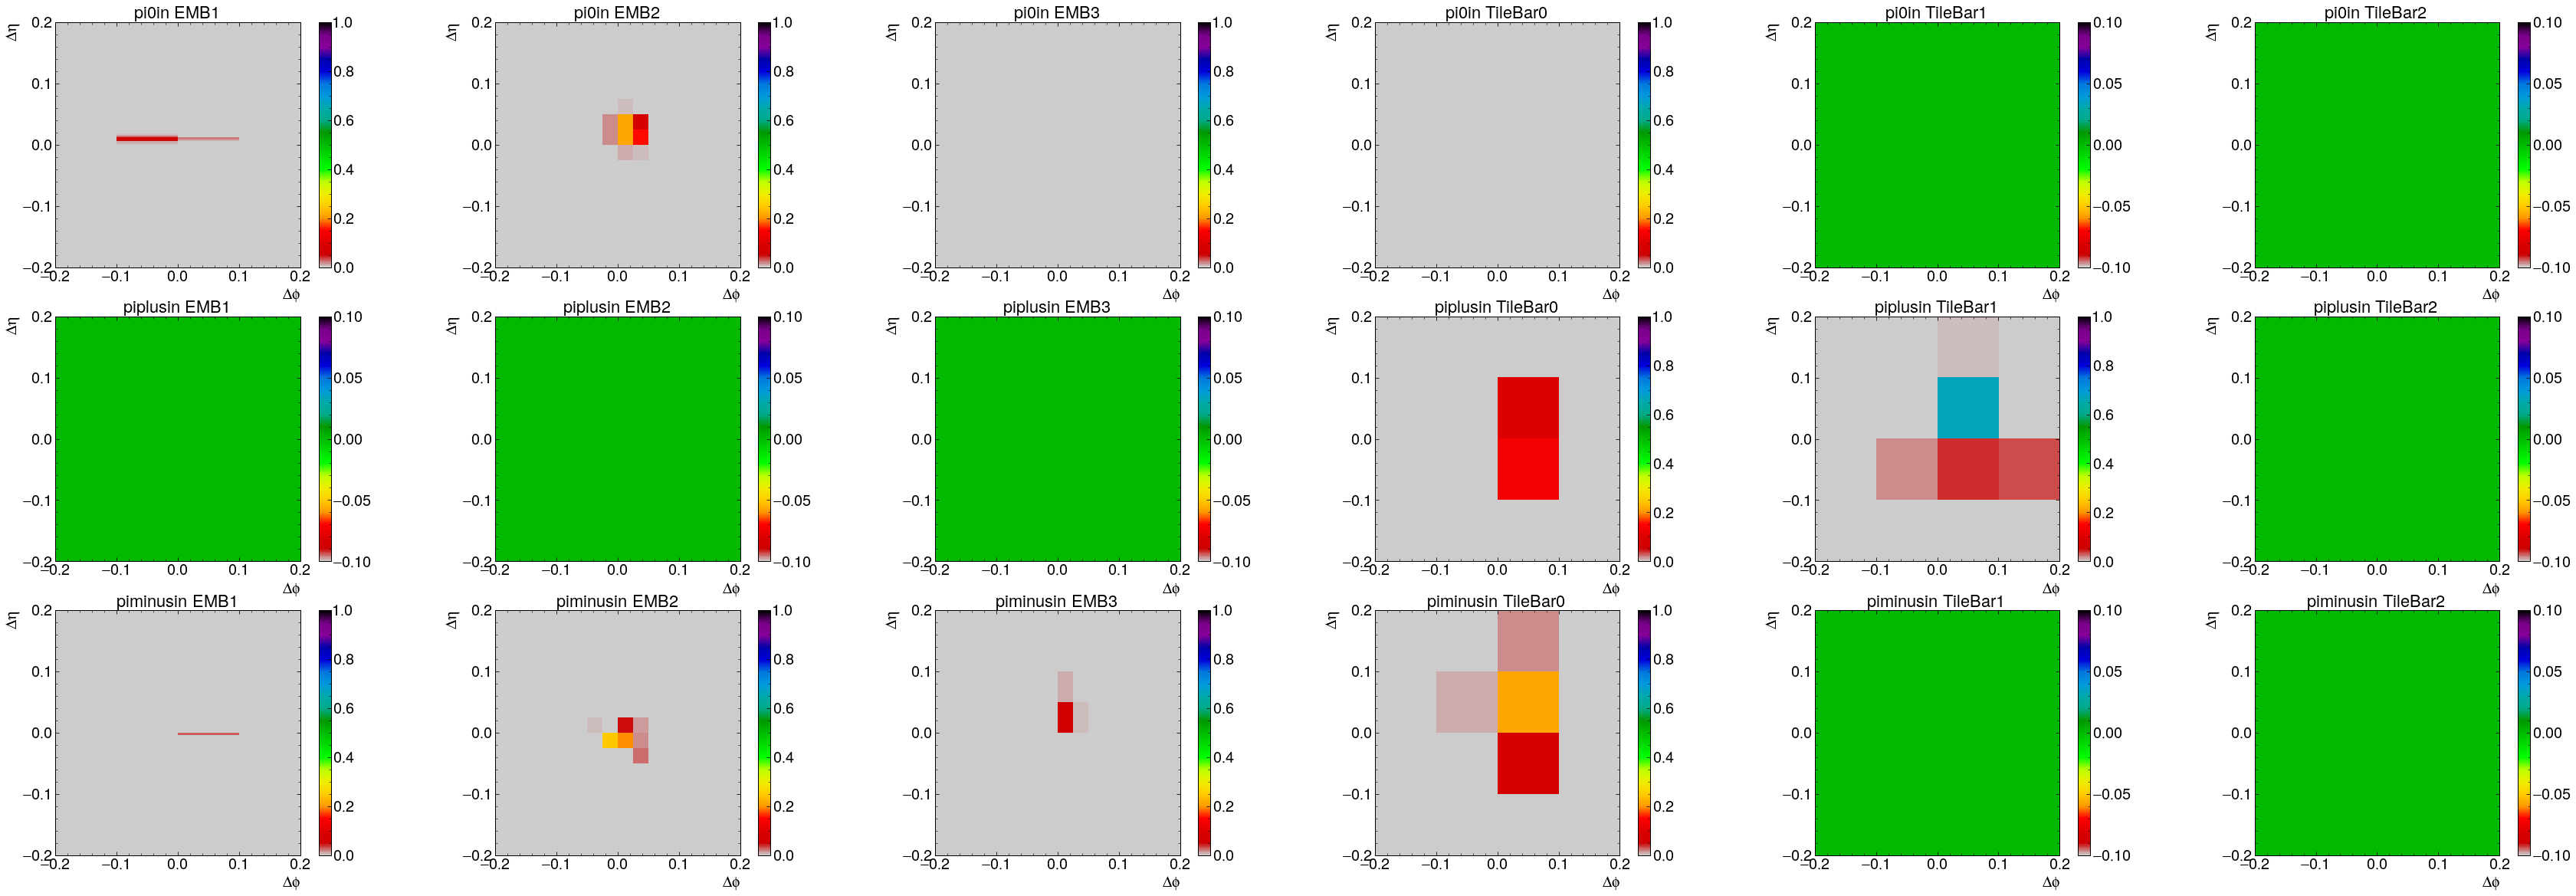

<Figure size 799.992x599.976 with 0 Axes>

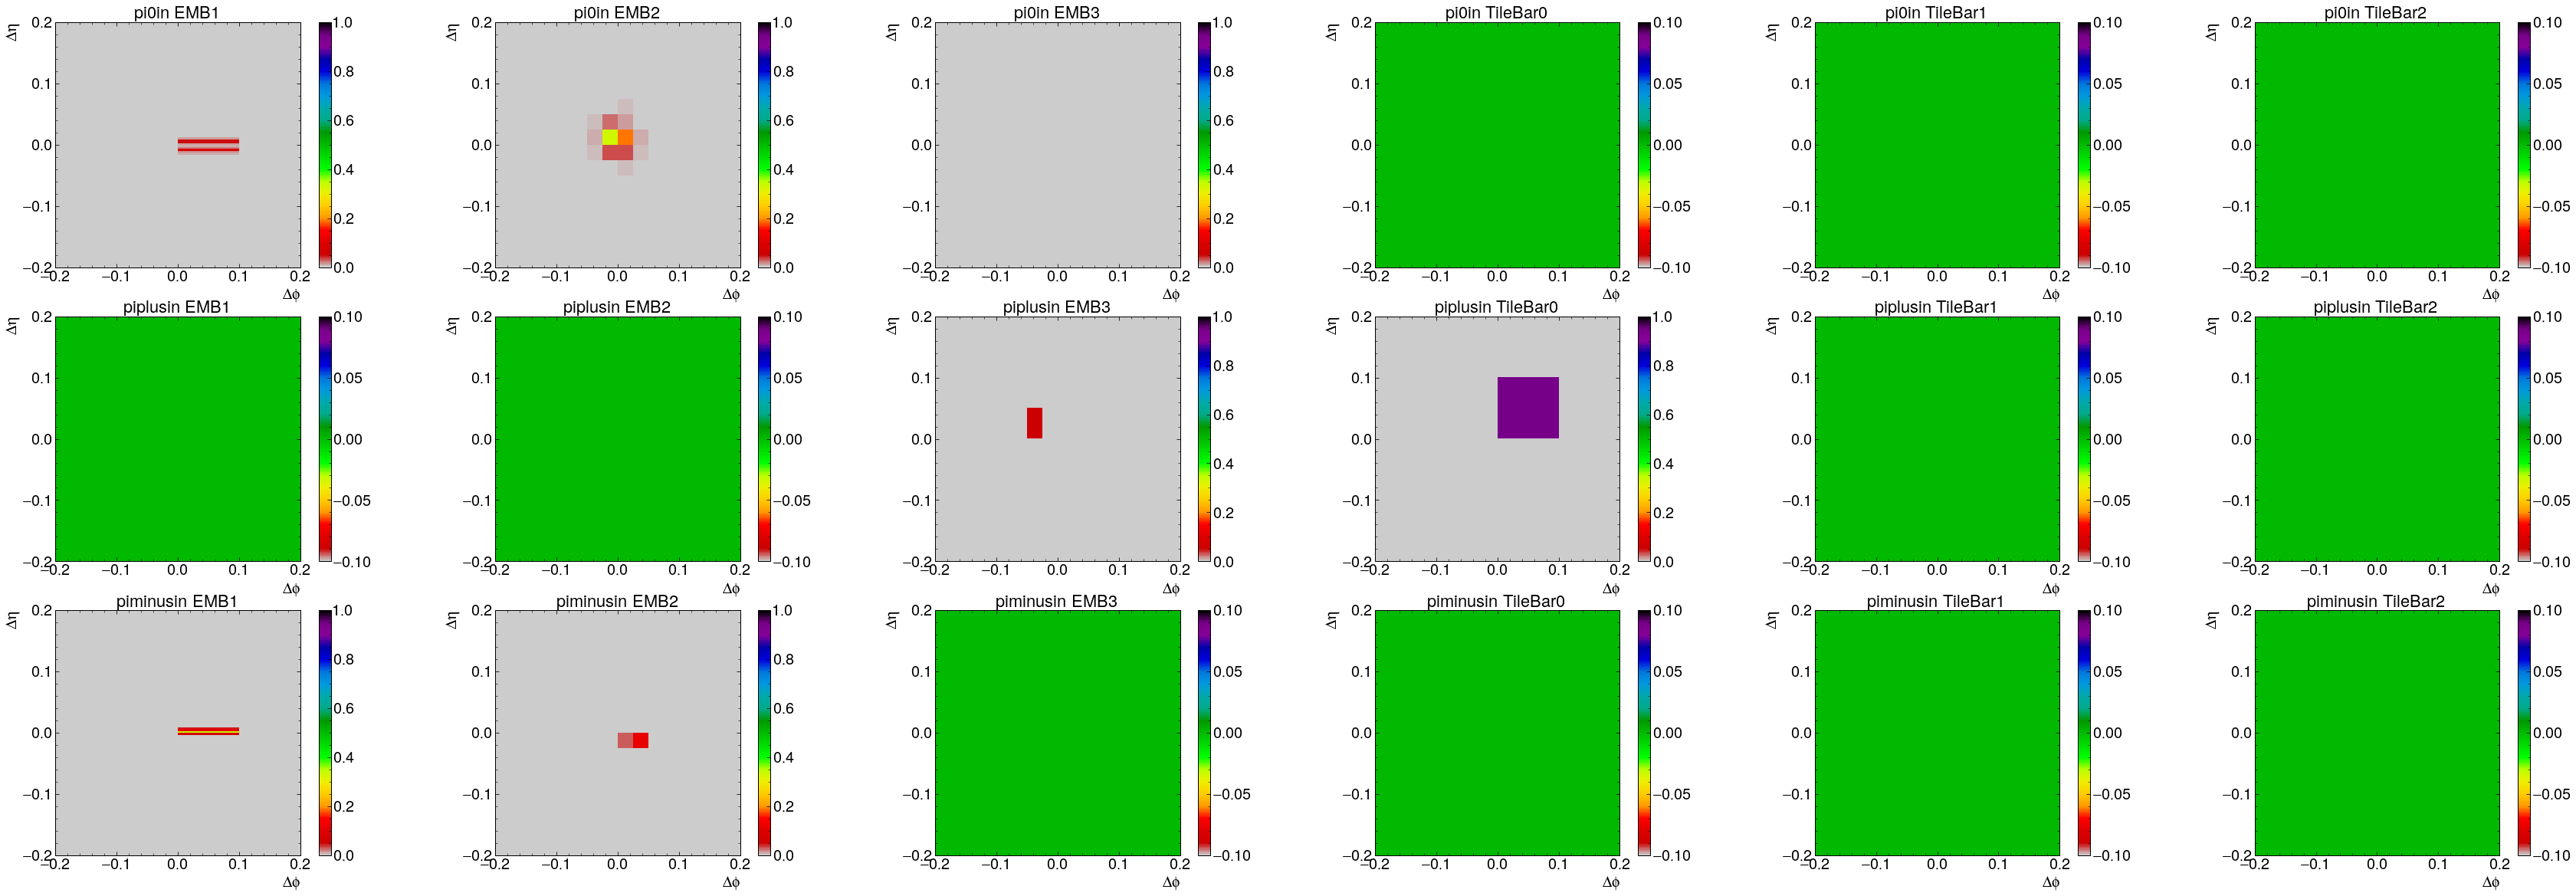

<Figure size 799.992x599.976 with 0 Axes>

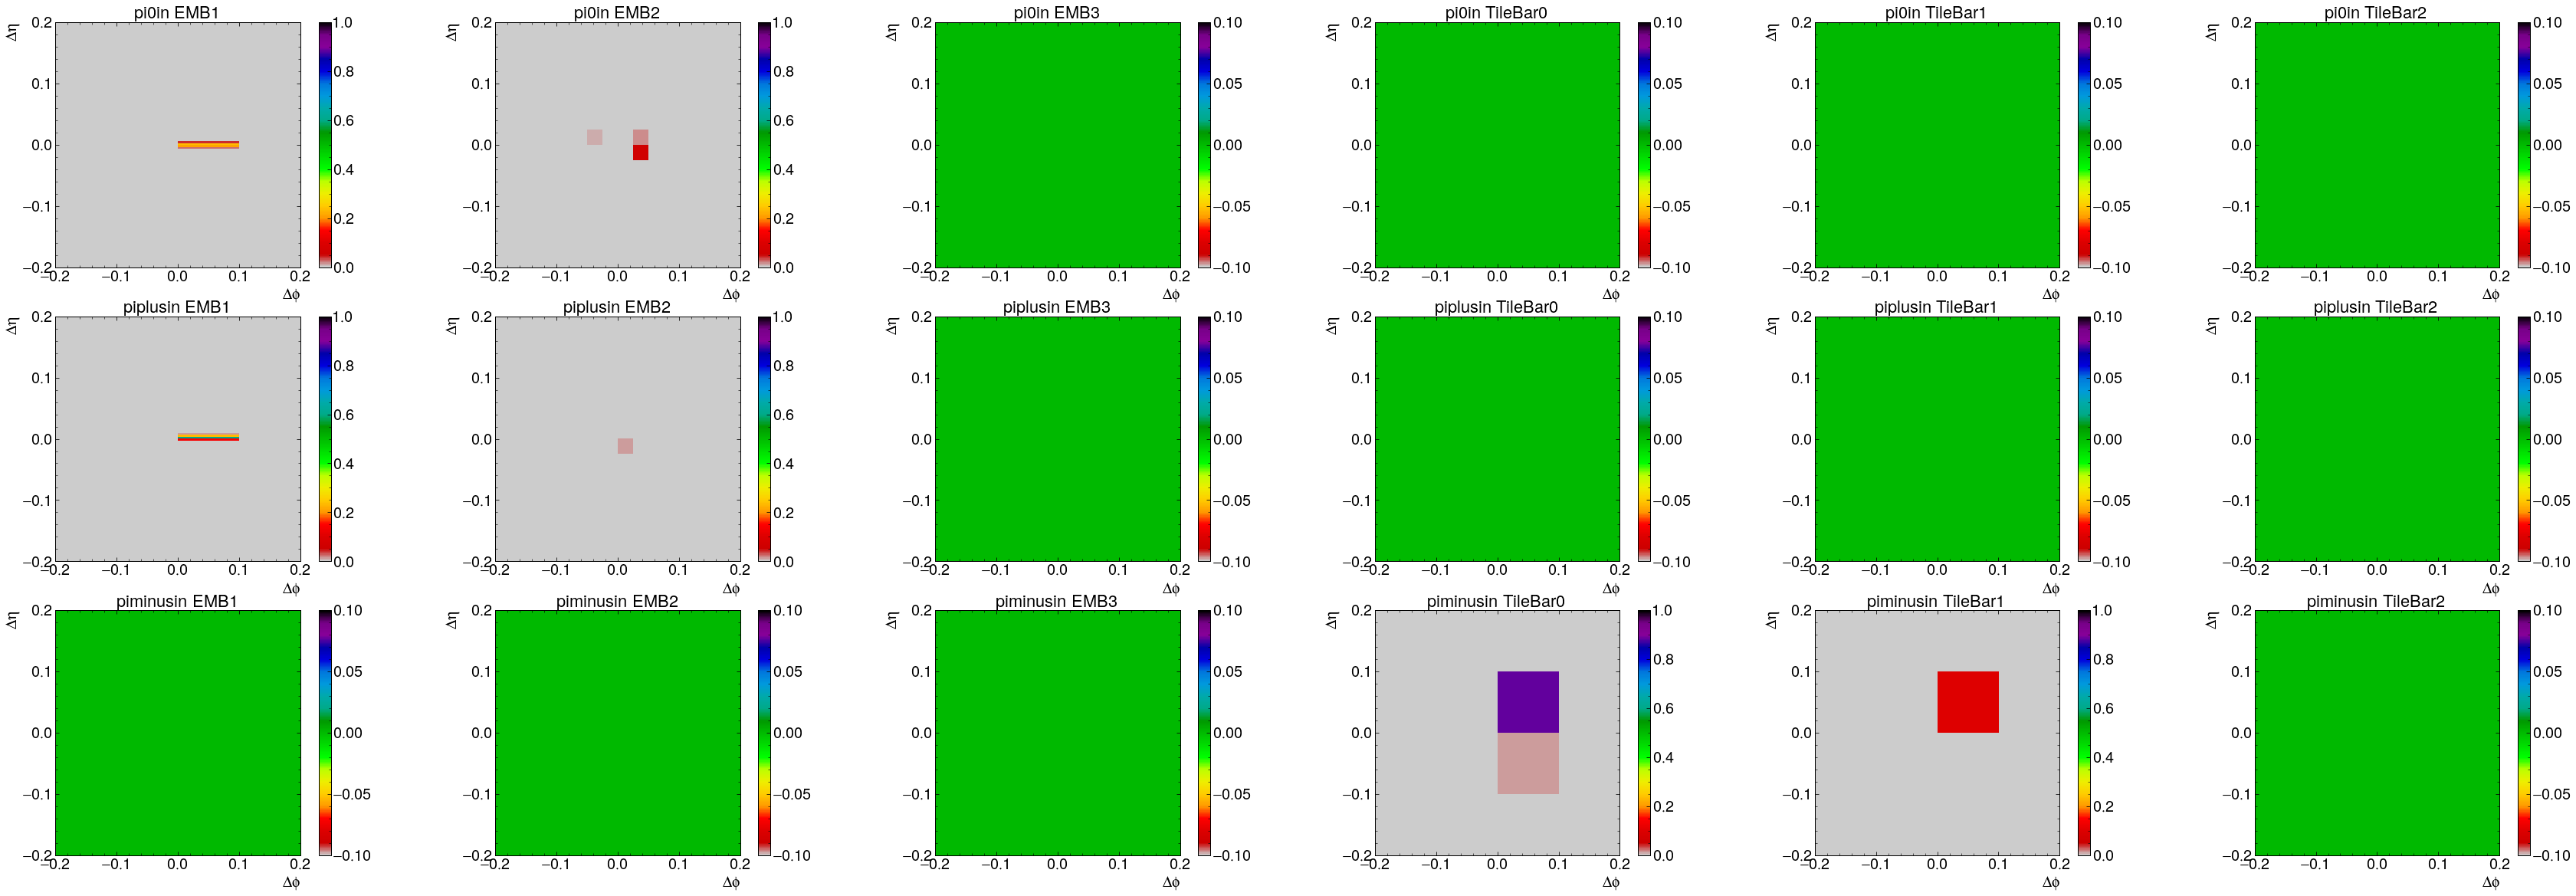

<Figure size 799.992x599.976 with 0 Axes>

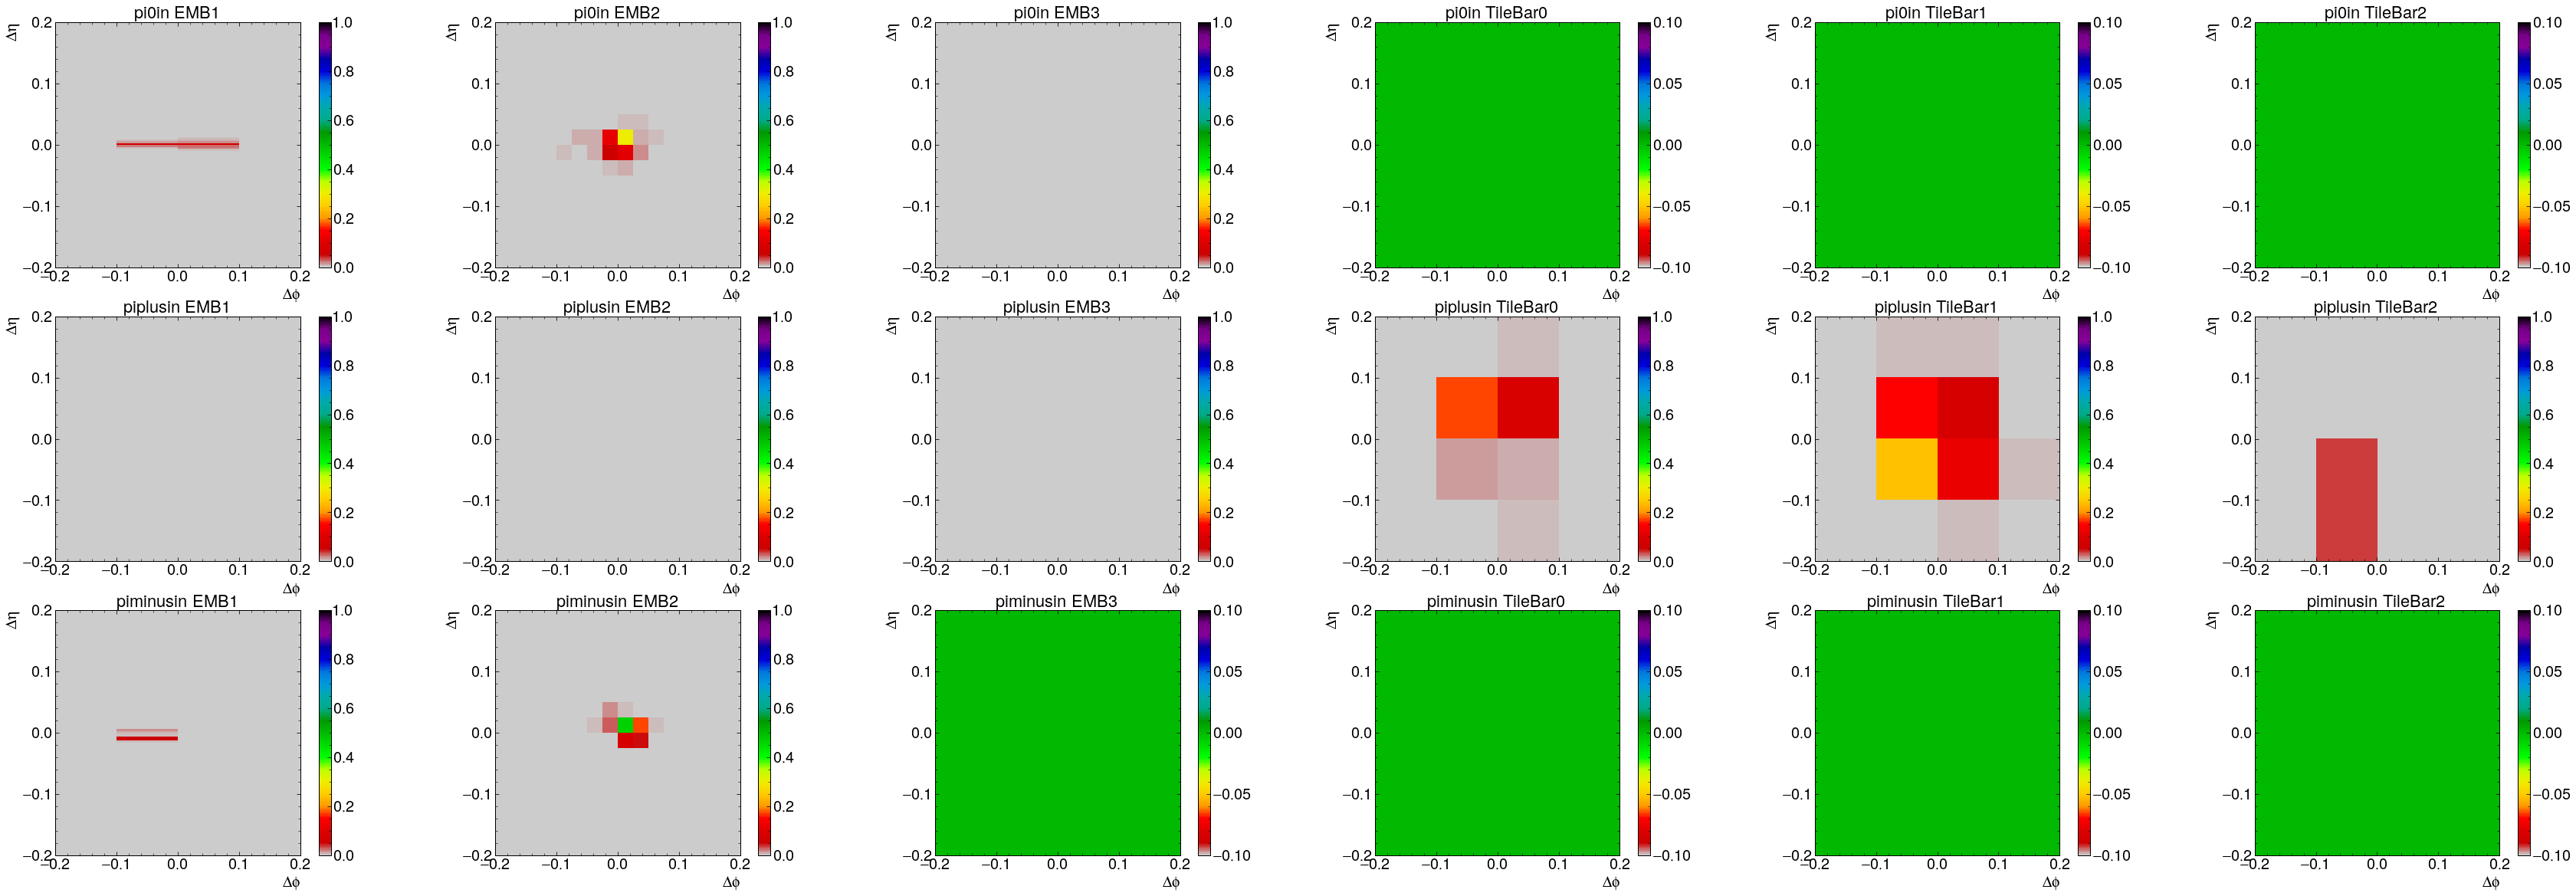

<Figure size 799.992x599.976 with 0 Axes>

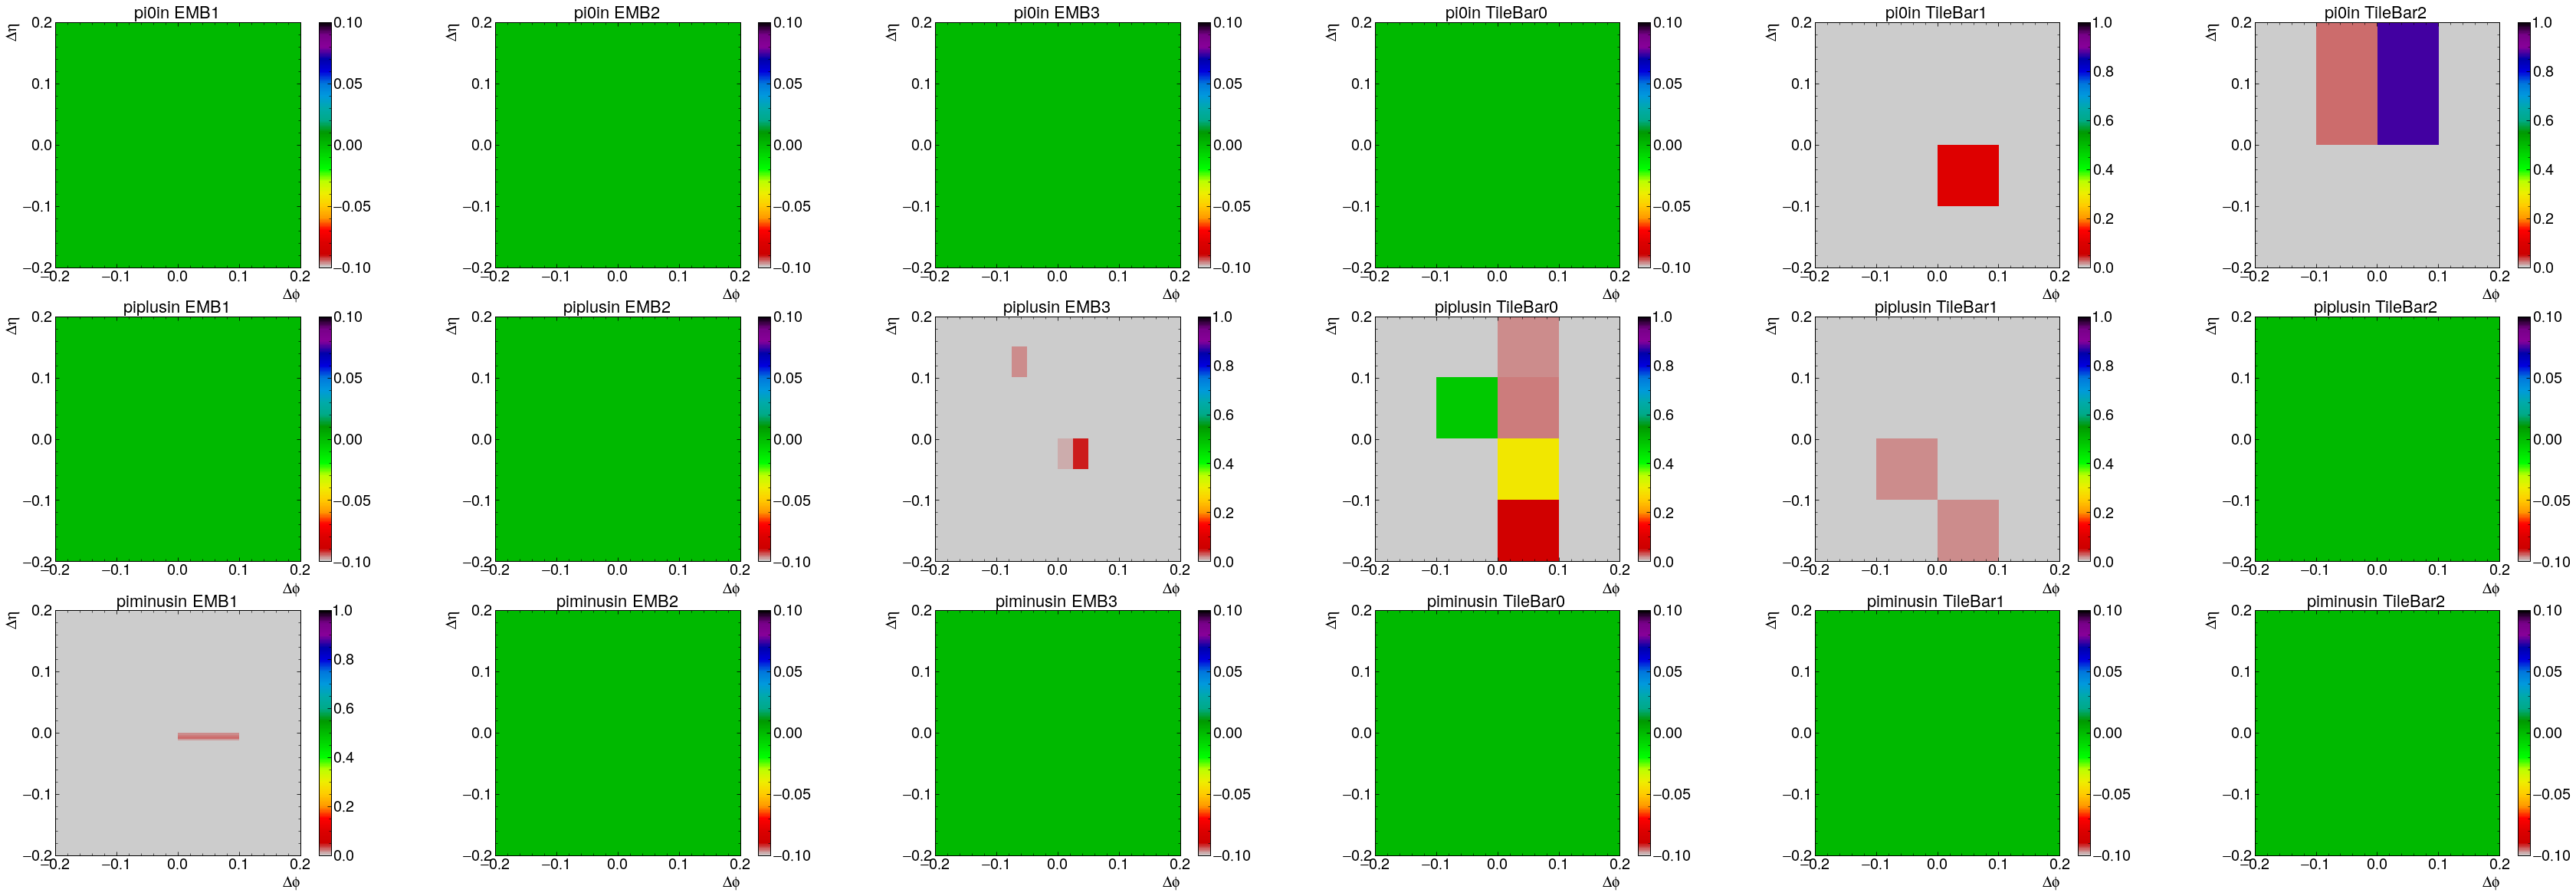

<Figure size 799.992x599.976 with 0 Axes>

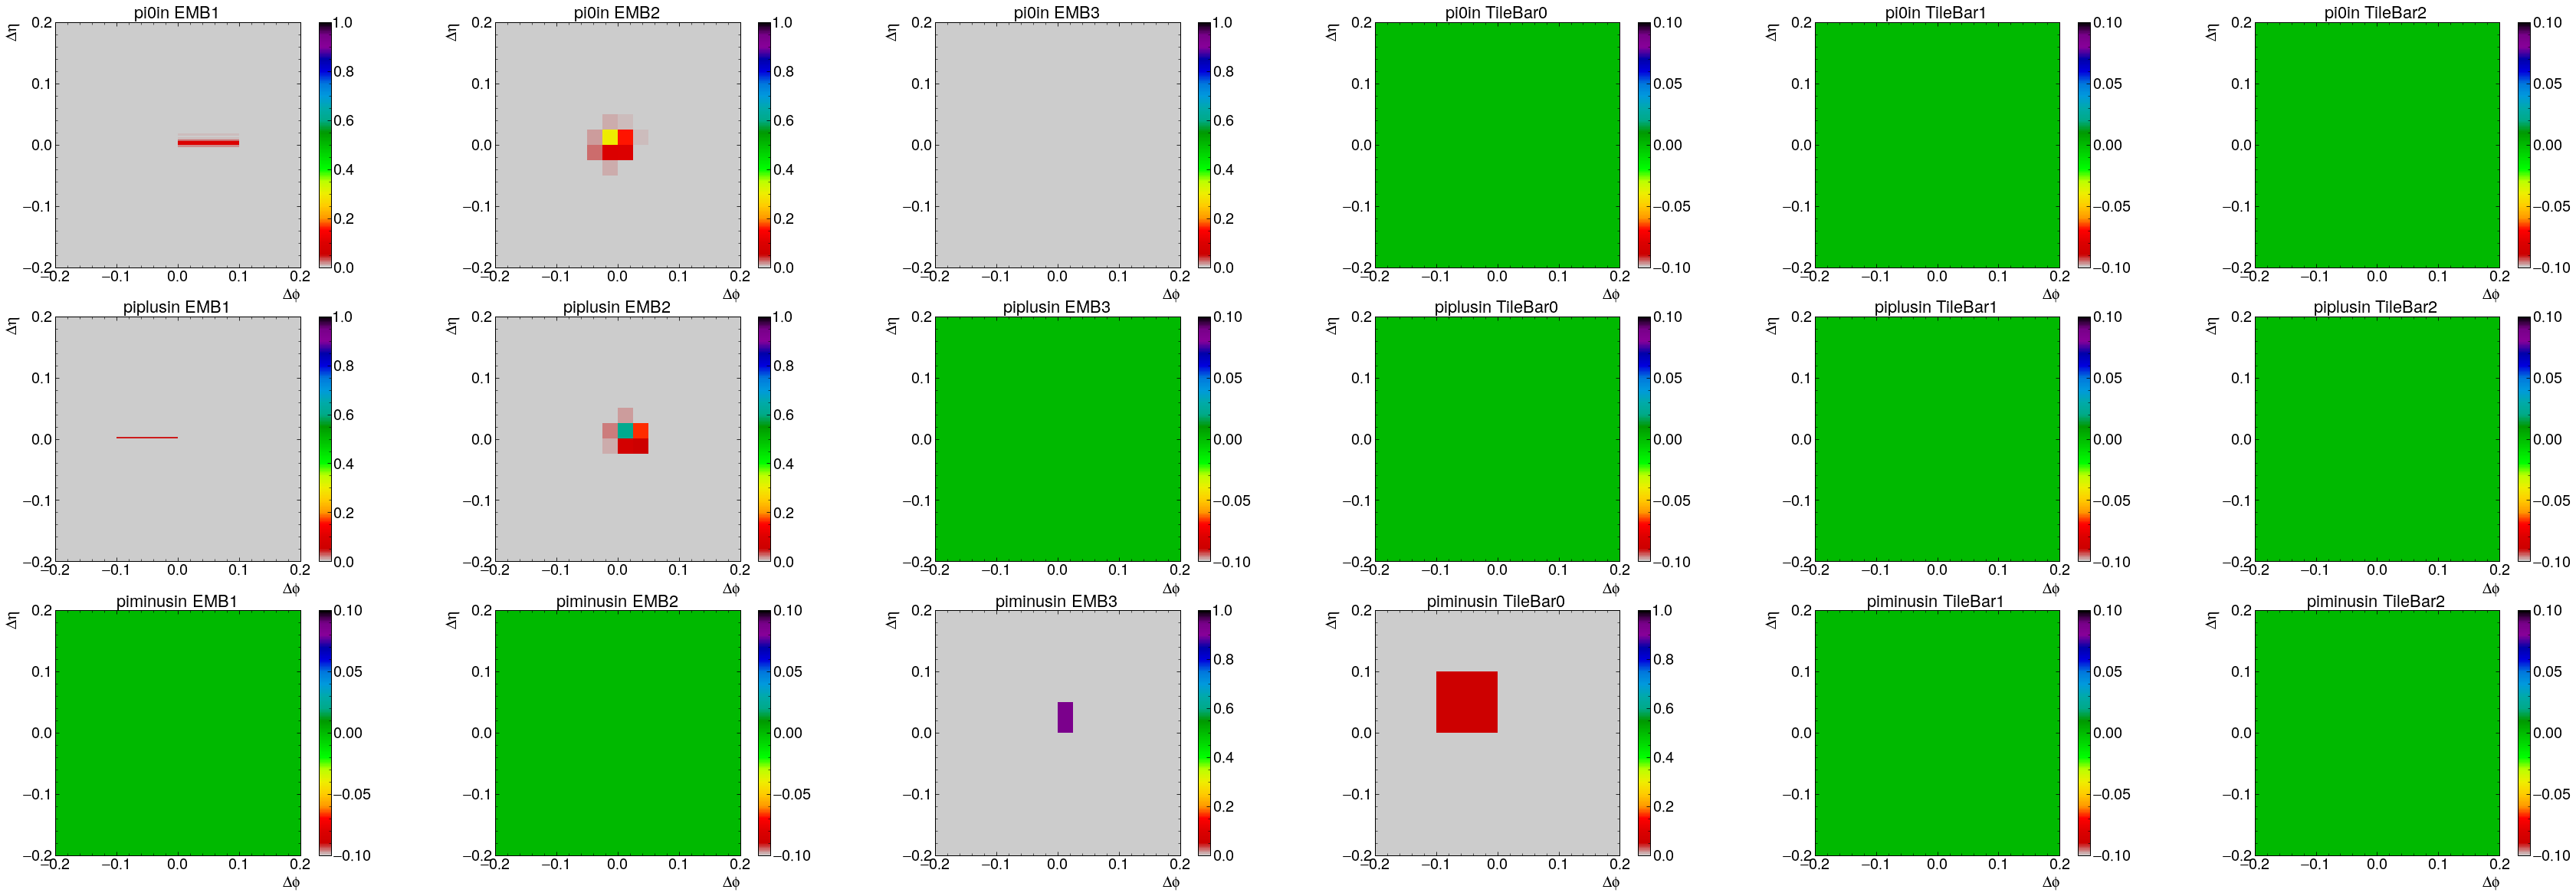

<Figure size 799.992x599.976 with 0 Axes>

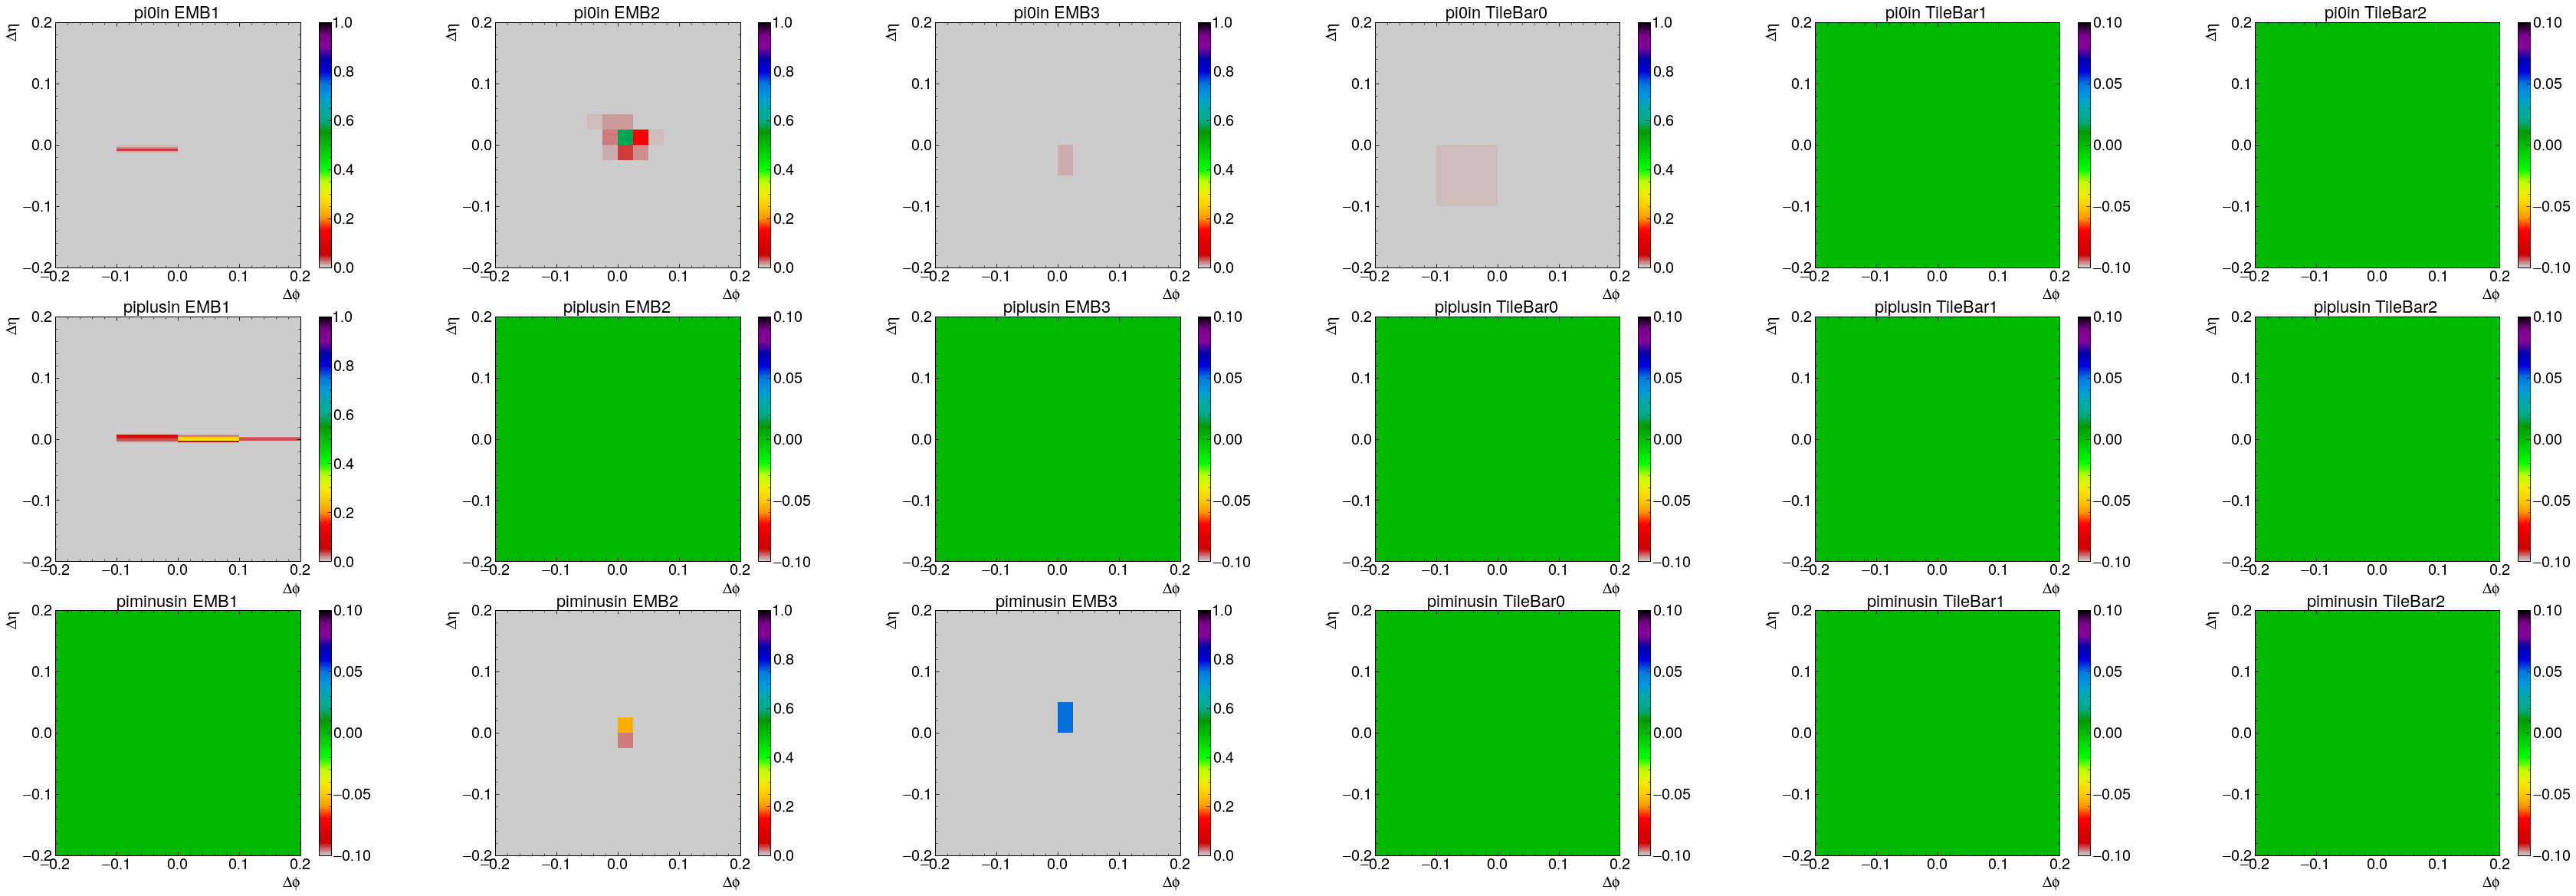

<Figure size 799.992x599.976 with 0 Axes>

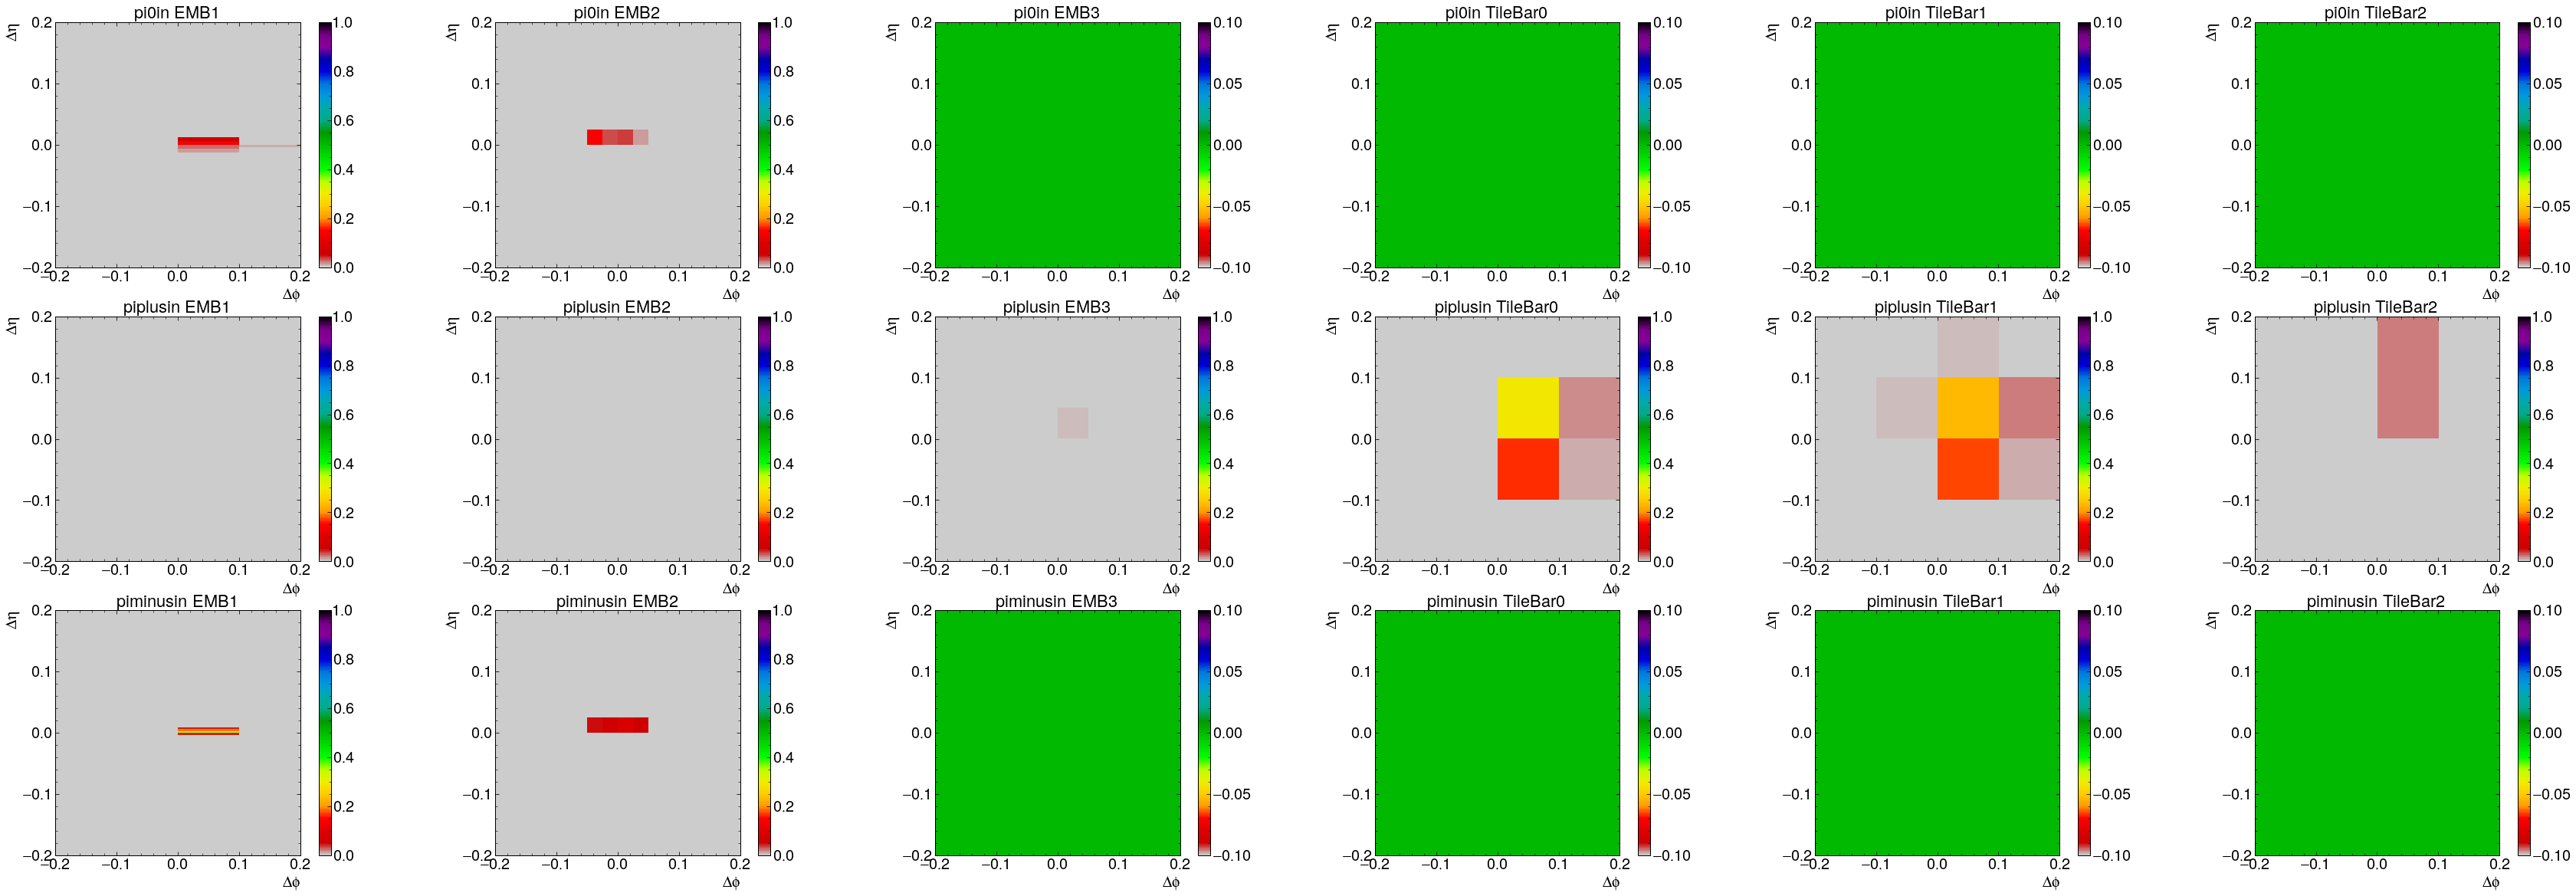

<Figure size 799.992x599.976 with 0 Axes>

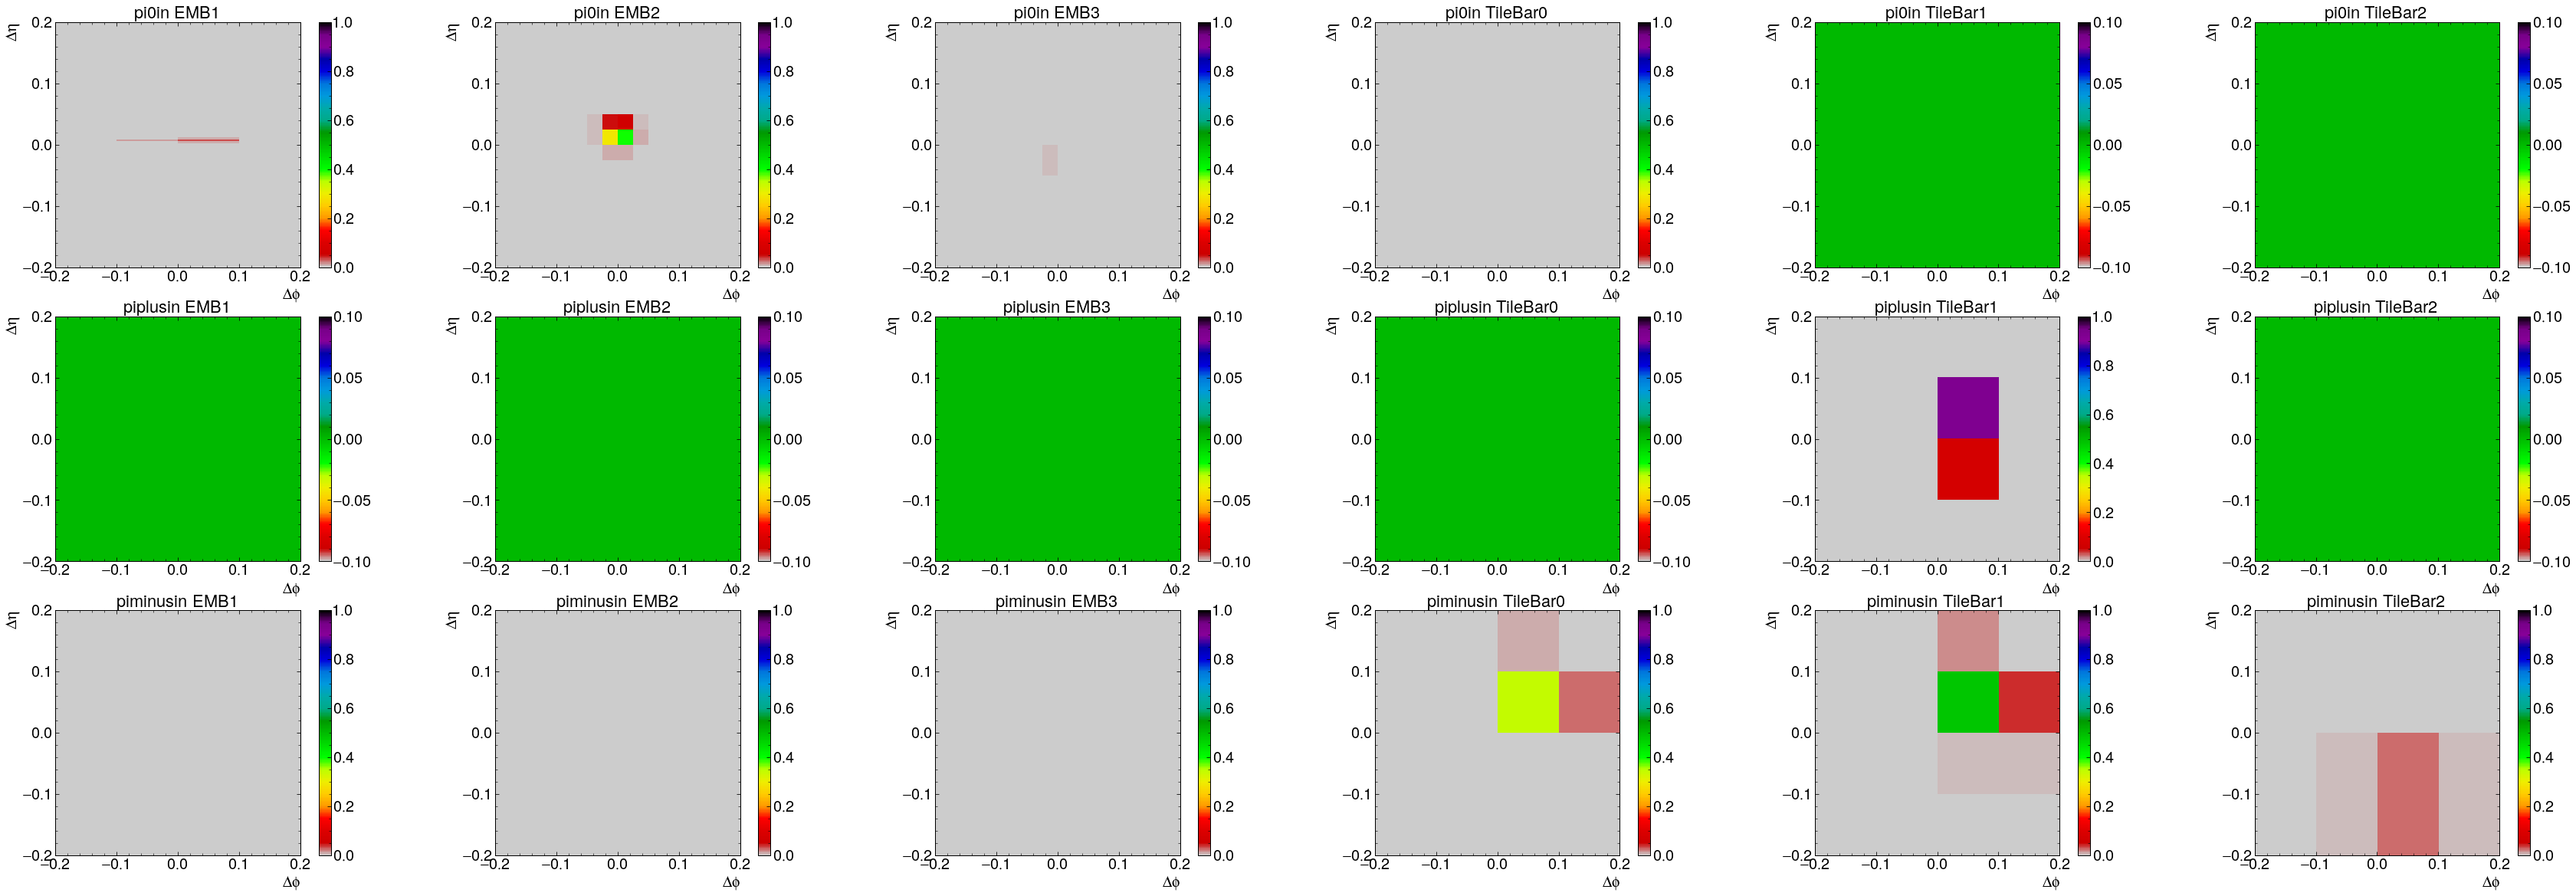

<Figure size 799.992x599.976 with 0 Axes>

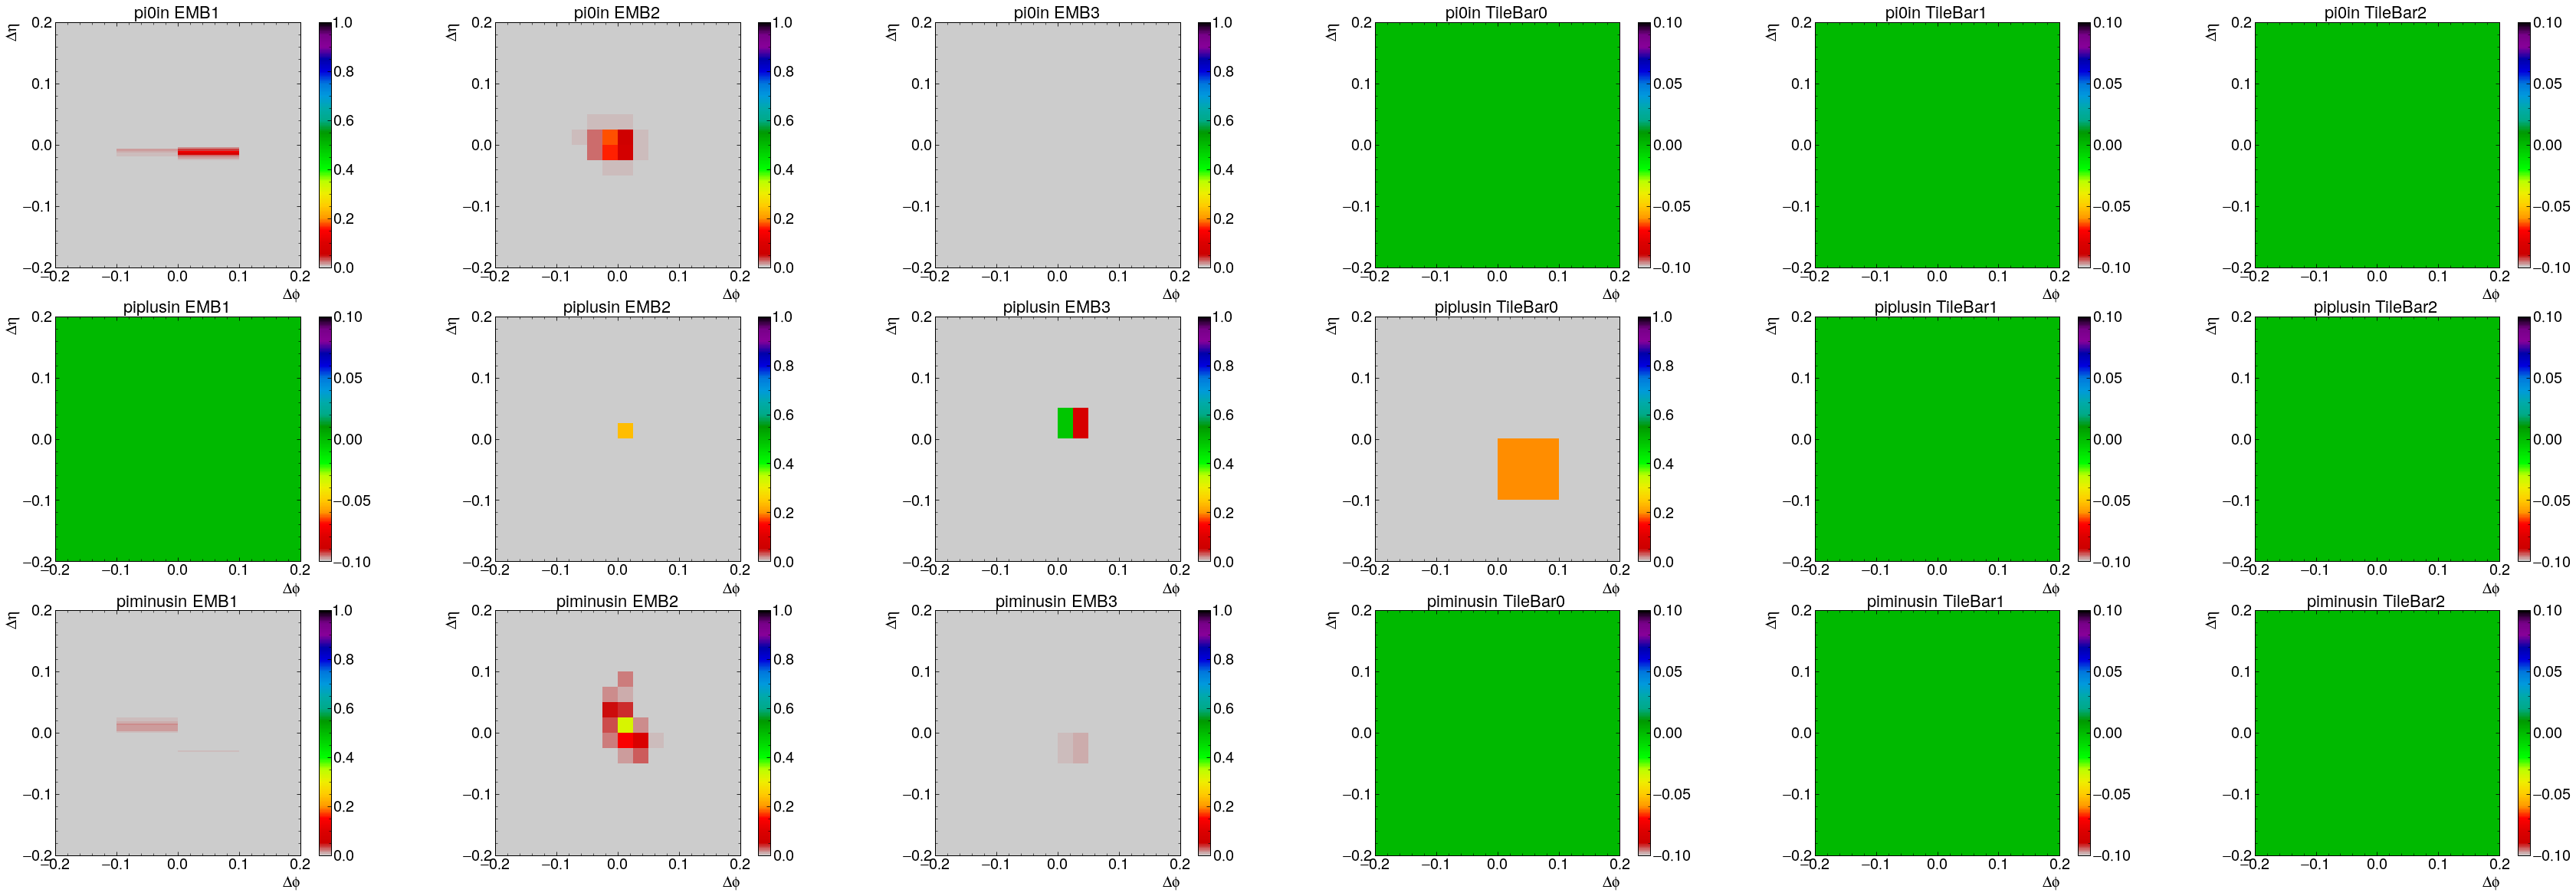

<Figure size 799.992x599.976 with 0 Axes>

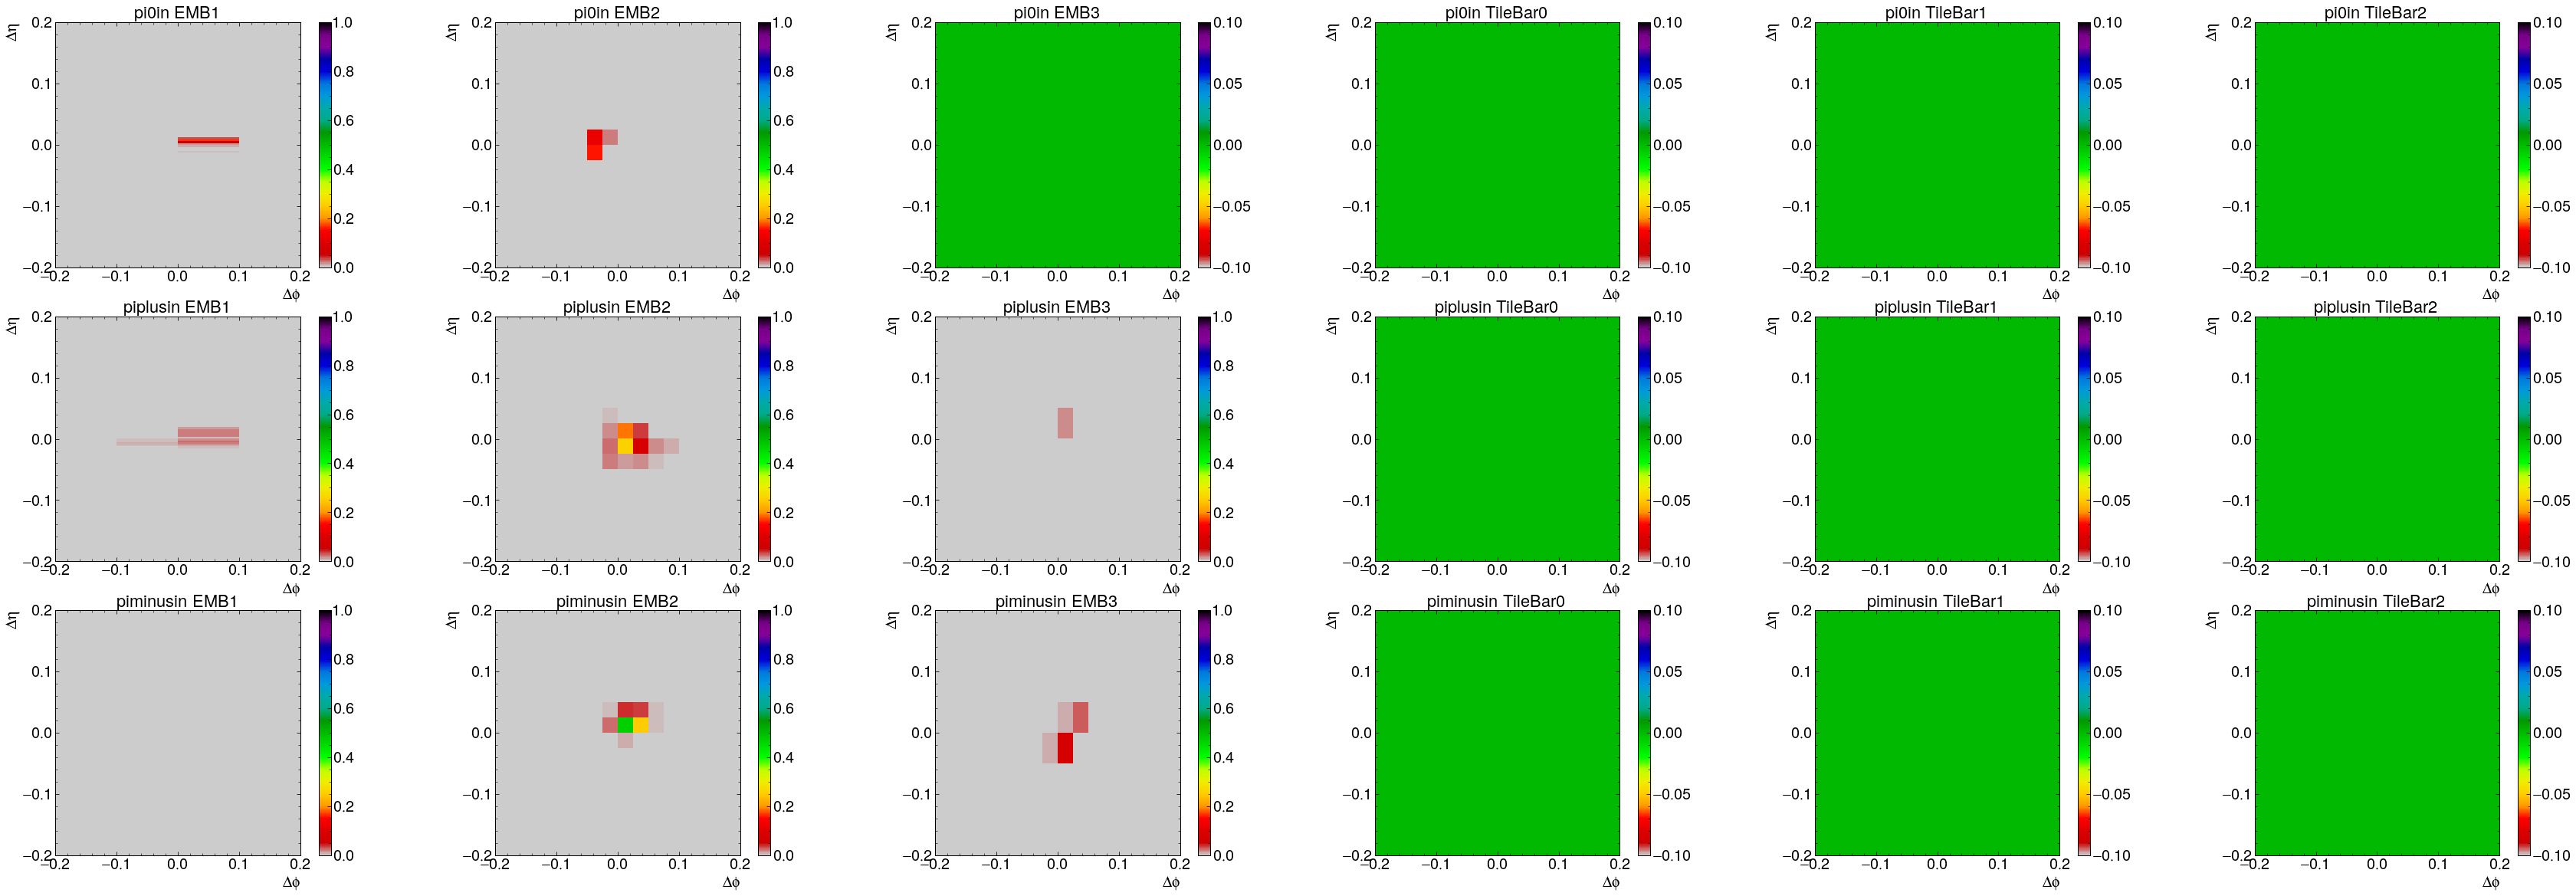

<Figure size 799.992x599.976 with 0 Axes>

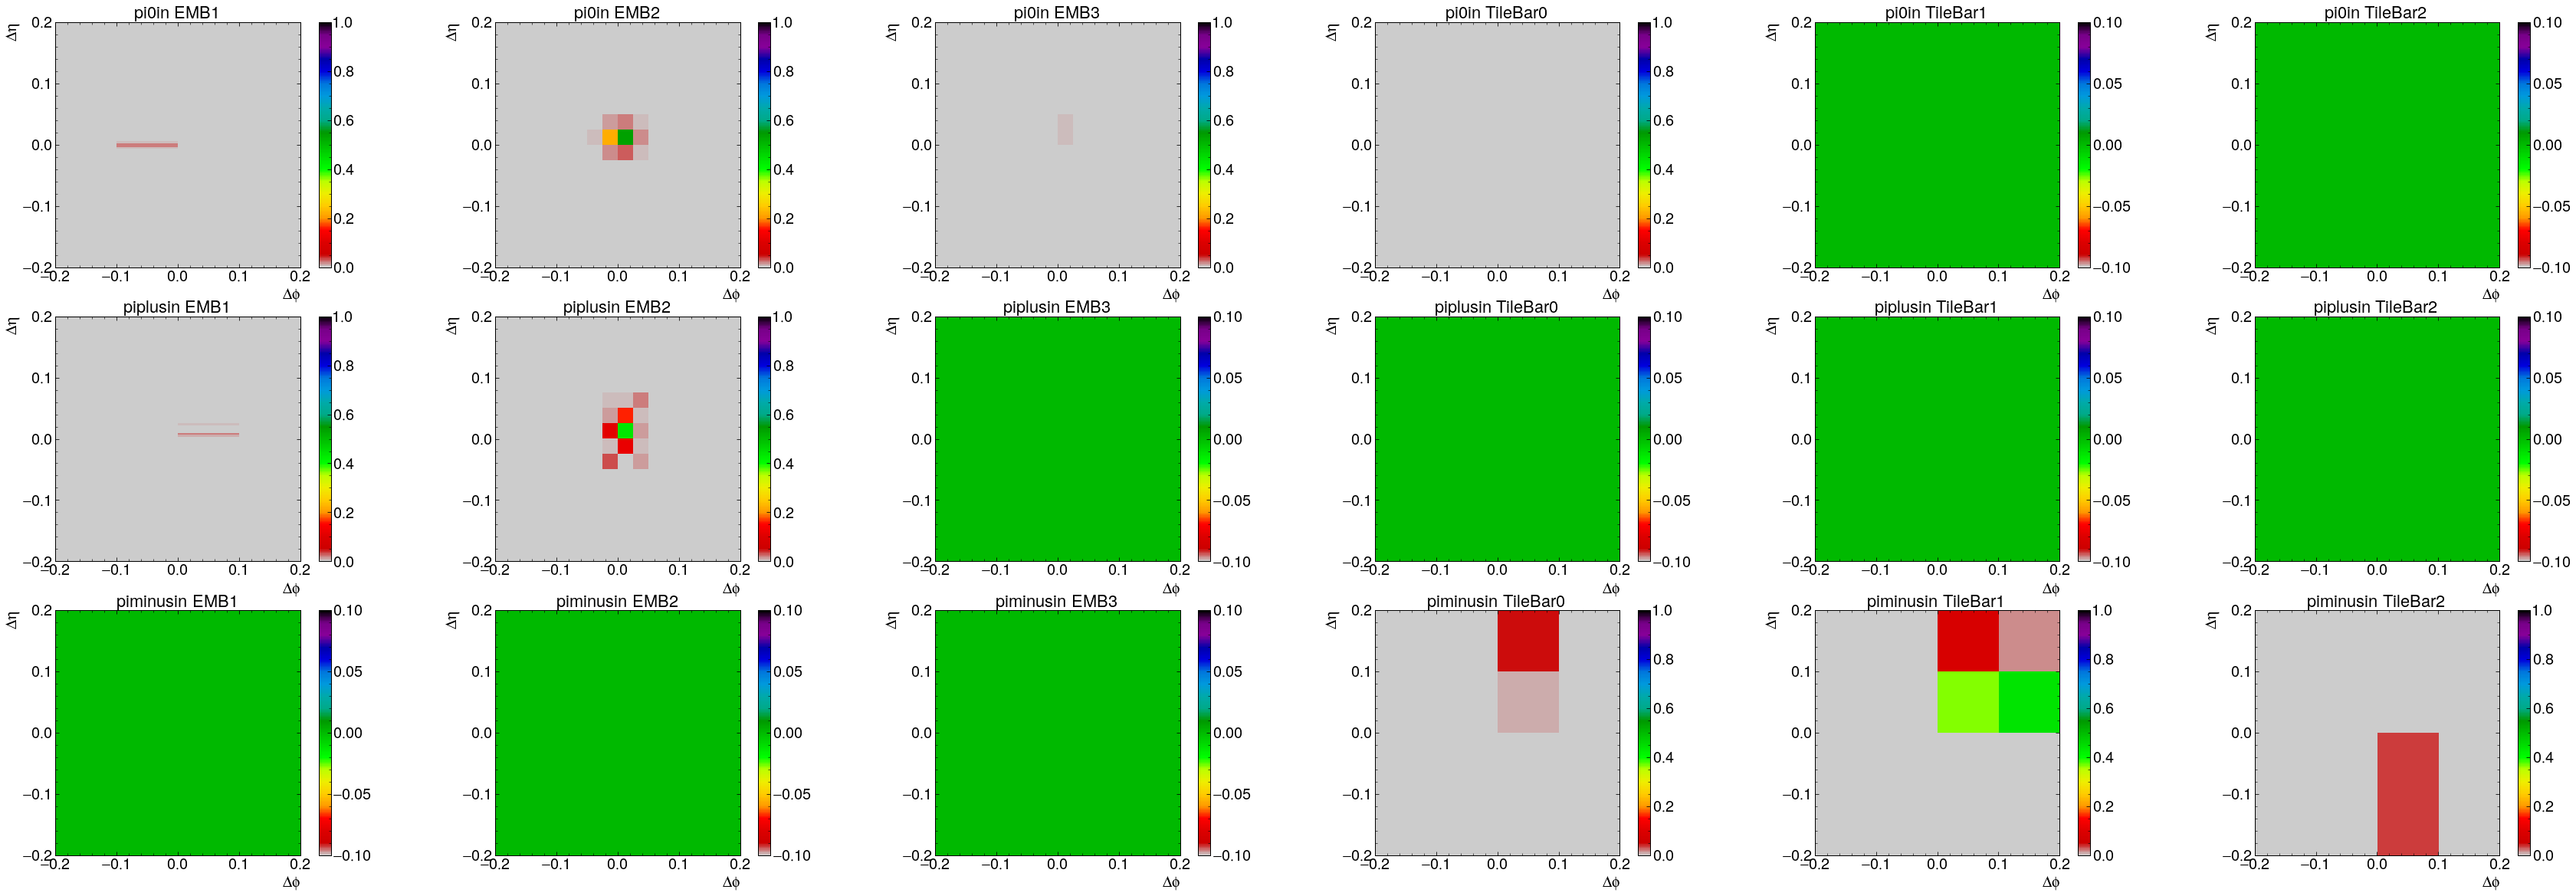

<Figure size 799.992x599.976 with 0 Axes>

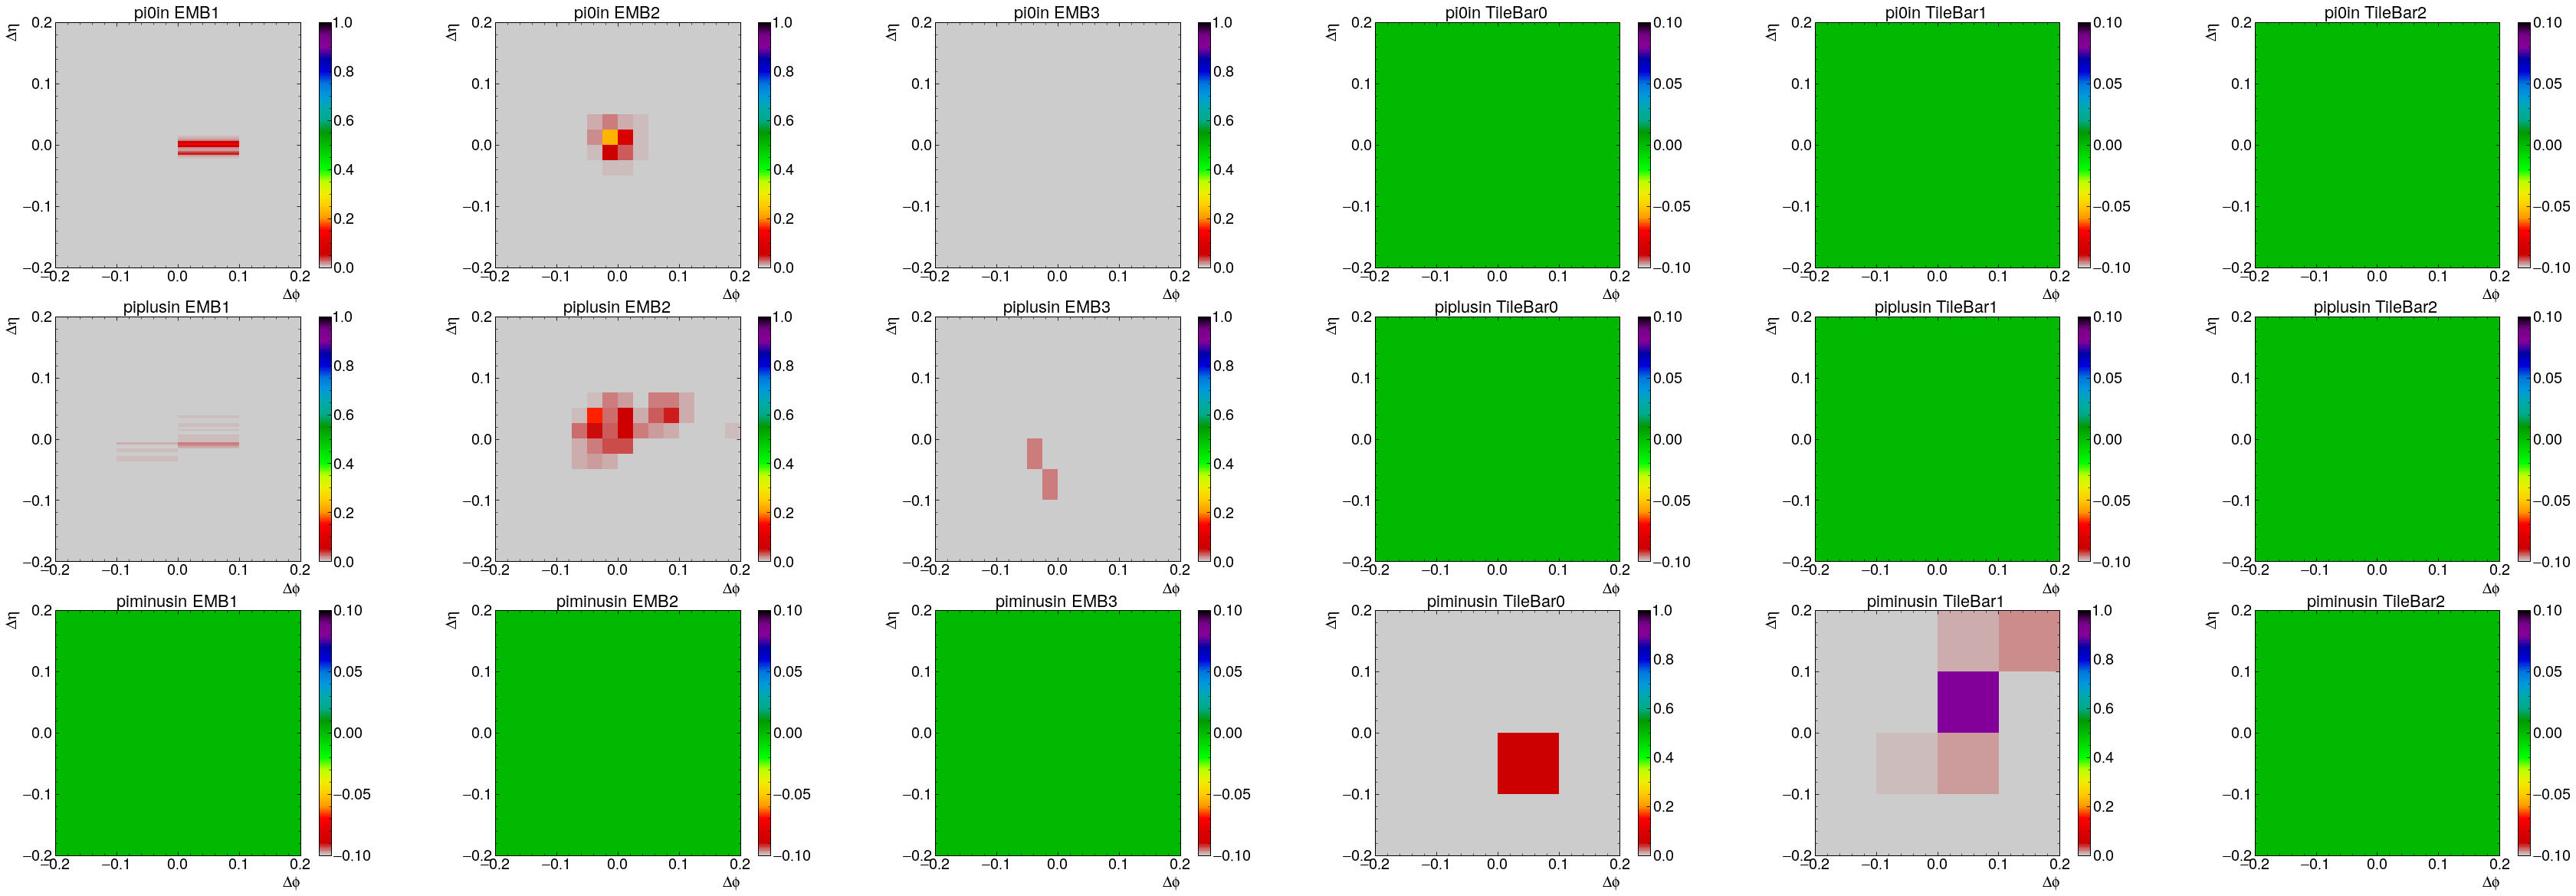

<Figure size 799.992x599.976 with 0 Axes>

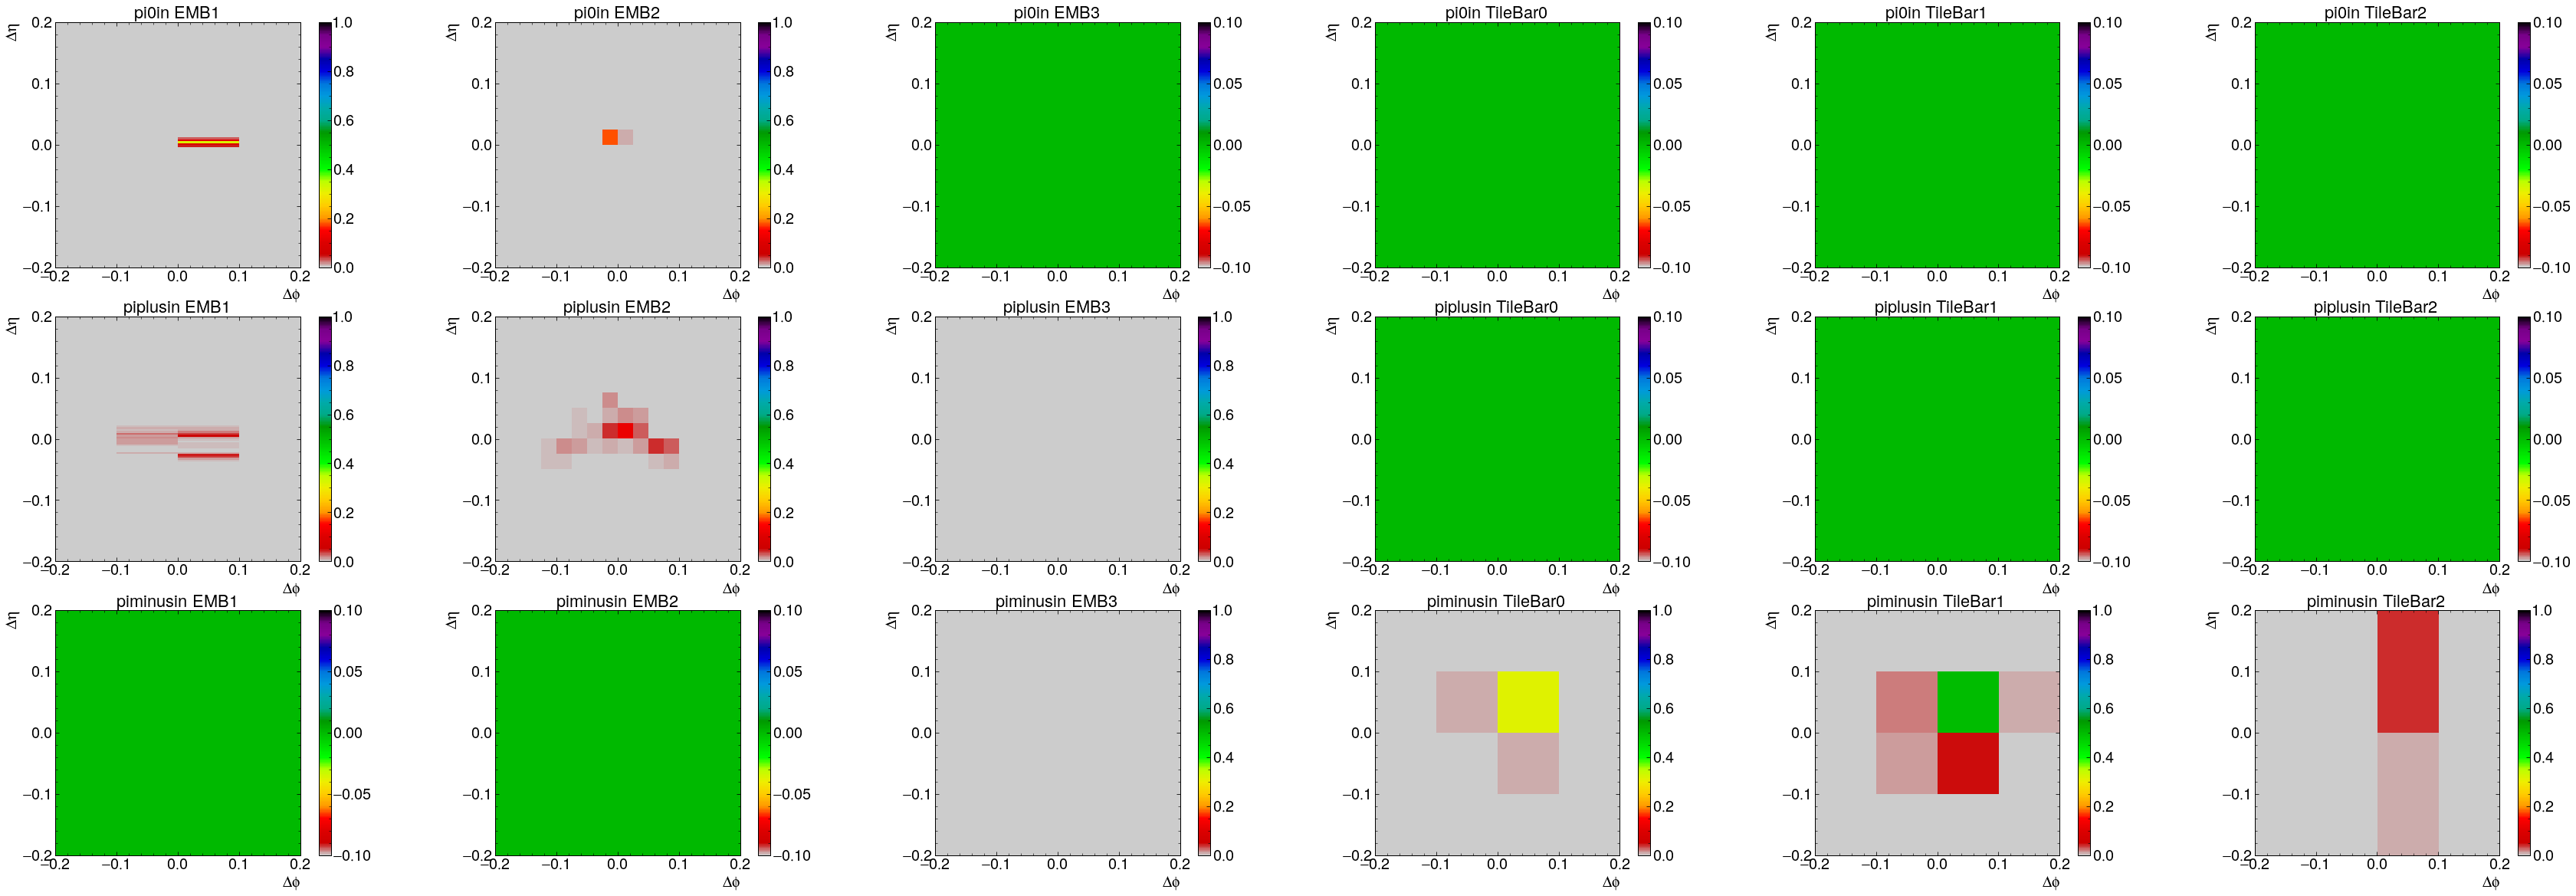

<Figure size 799.992x599.976 with 0 Axes>

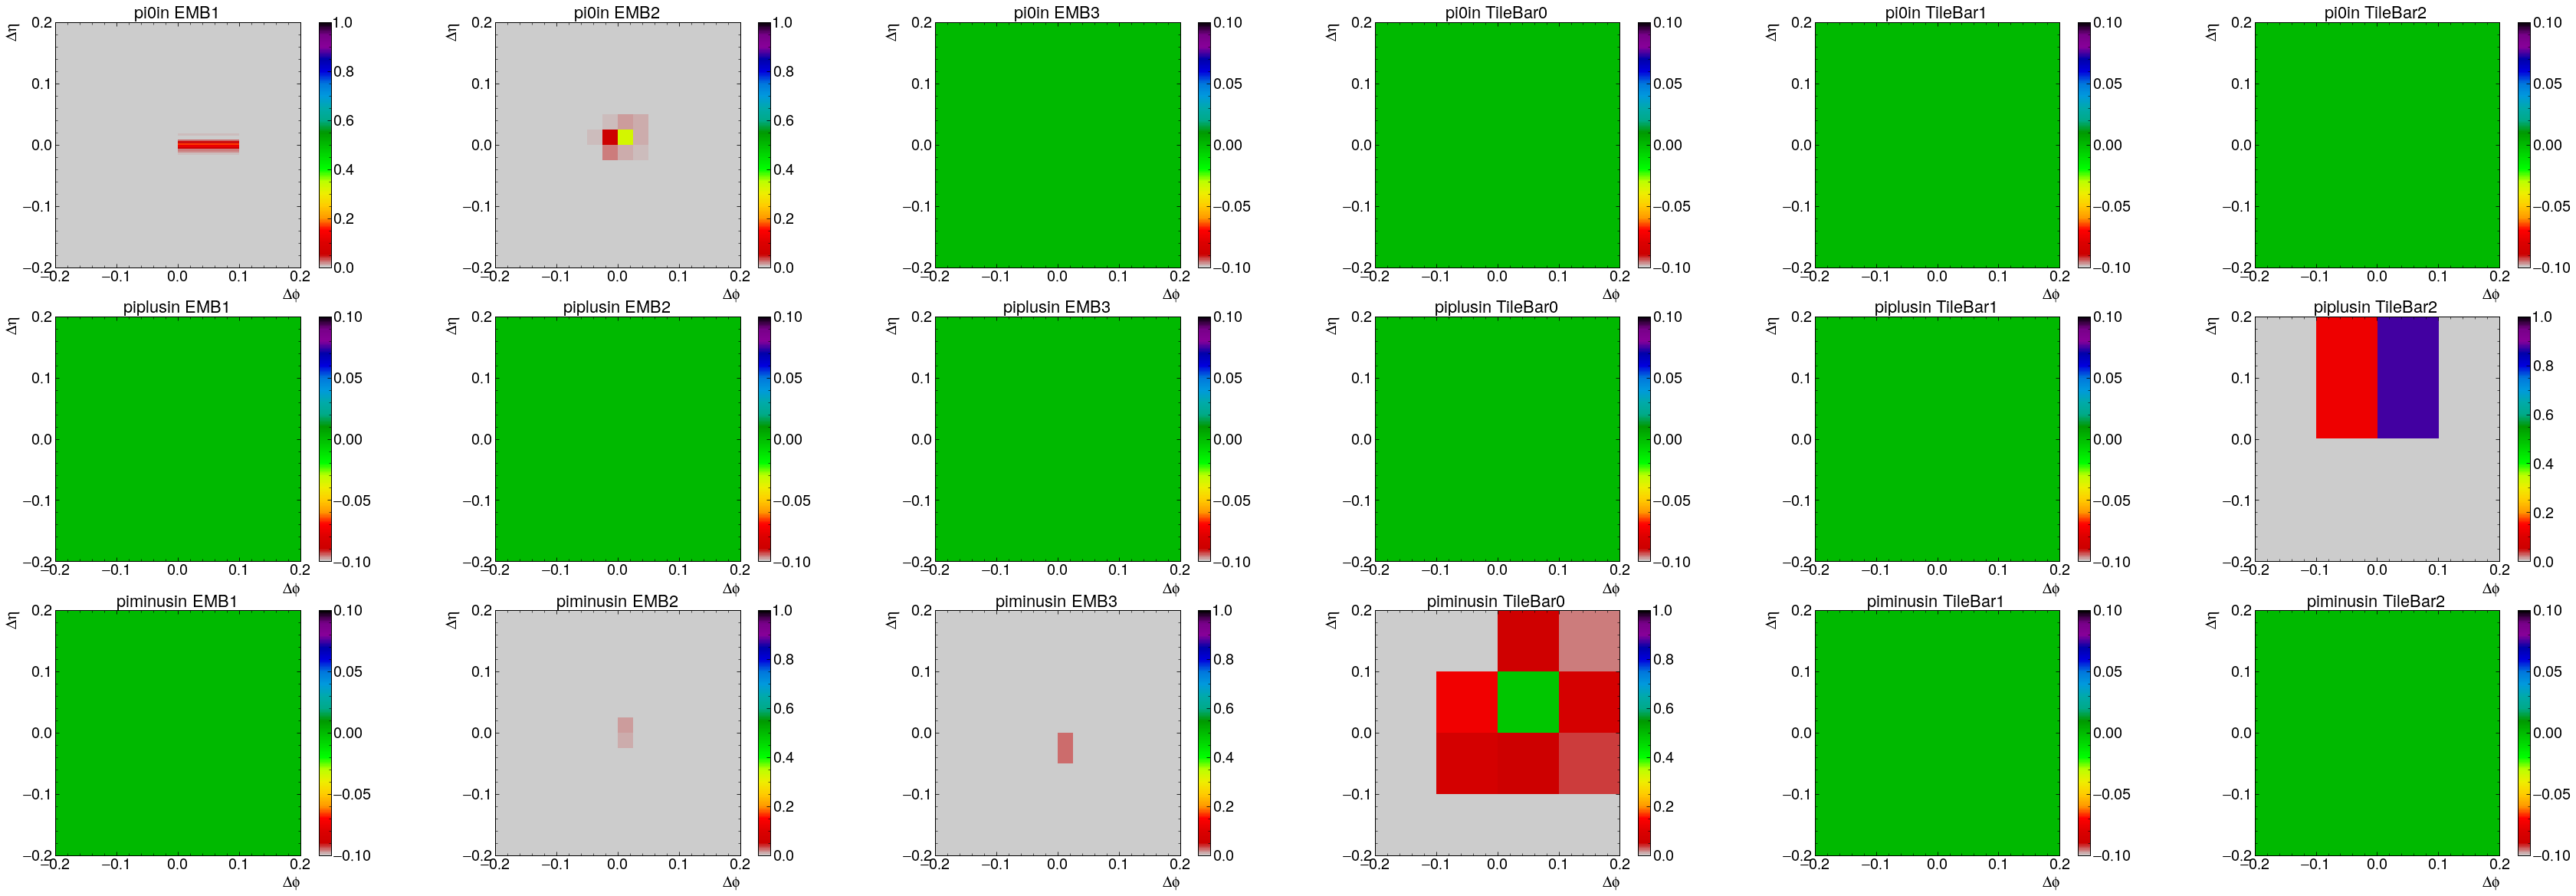

<Figure size 799.992x599.976 with 0 Axes>

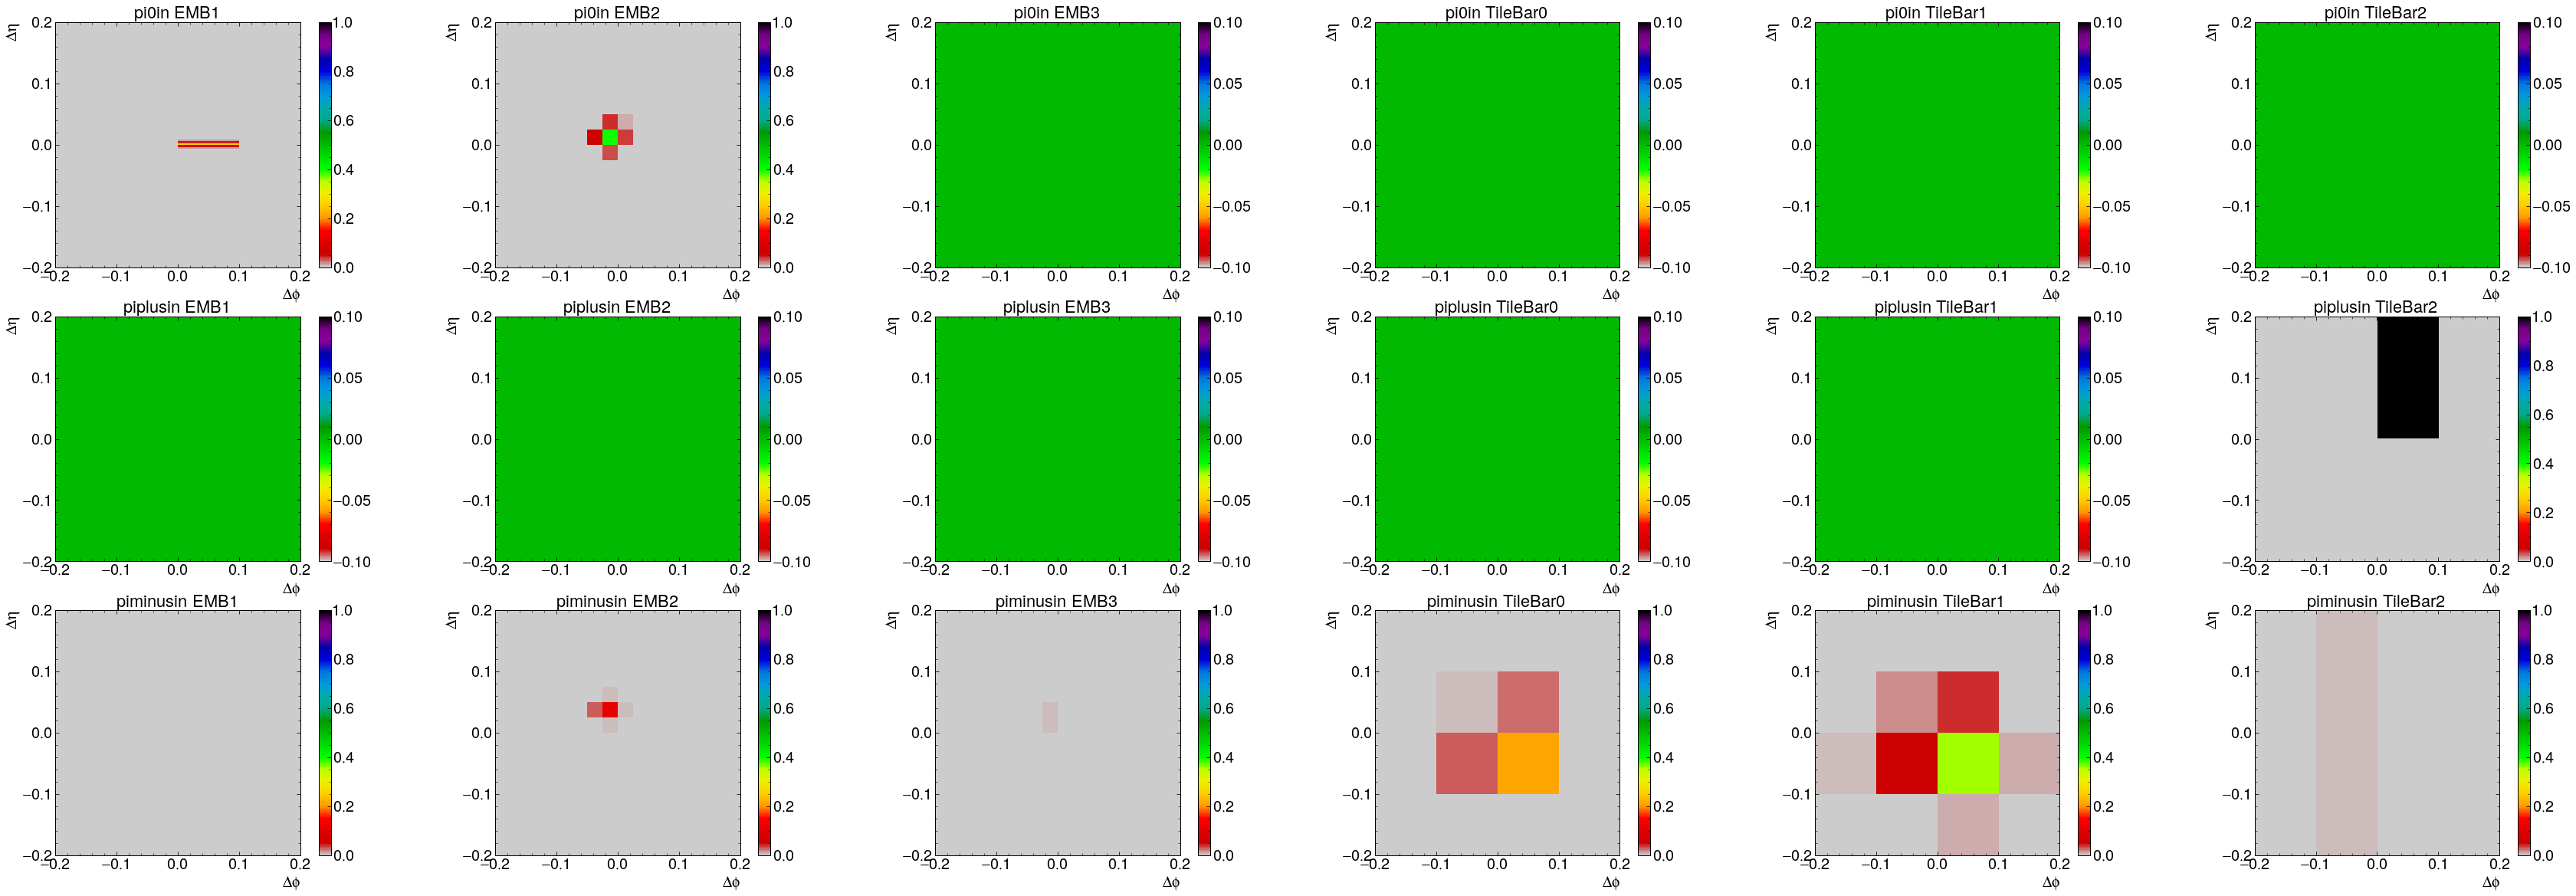

<Figure size 799.992x599.976 with 0 Axes>

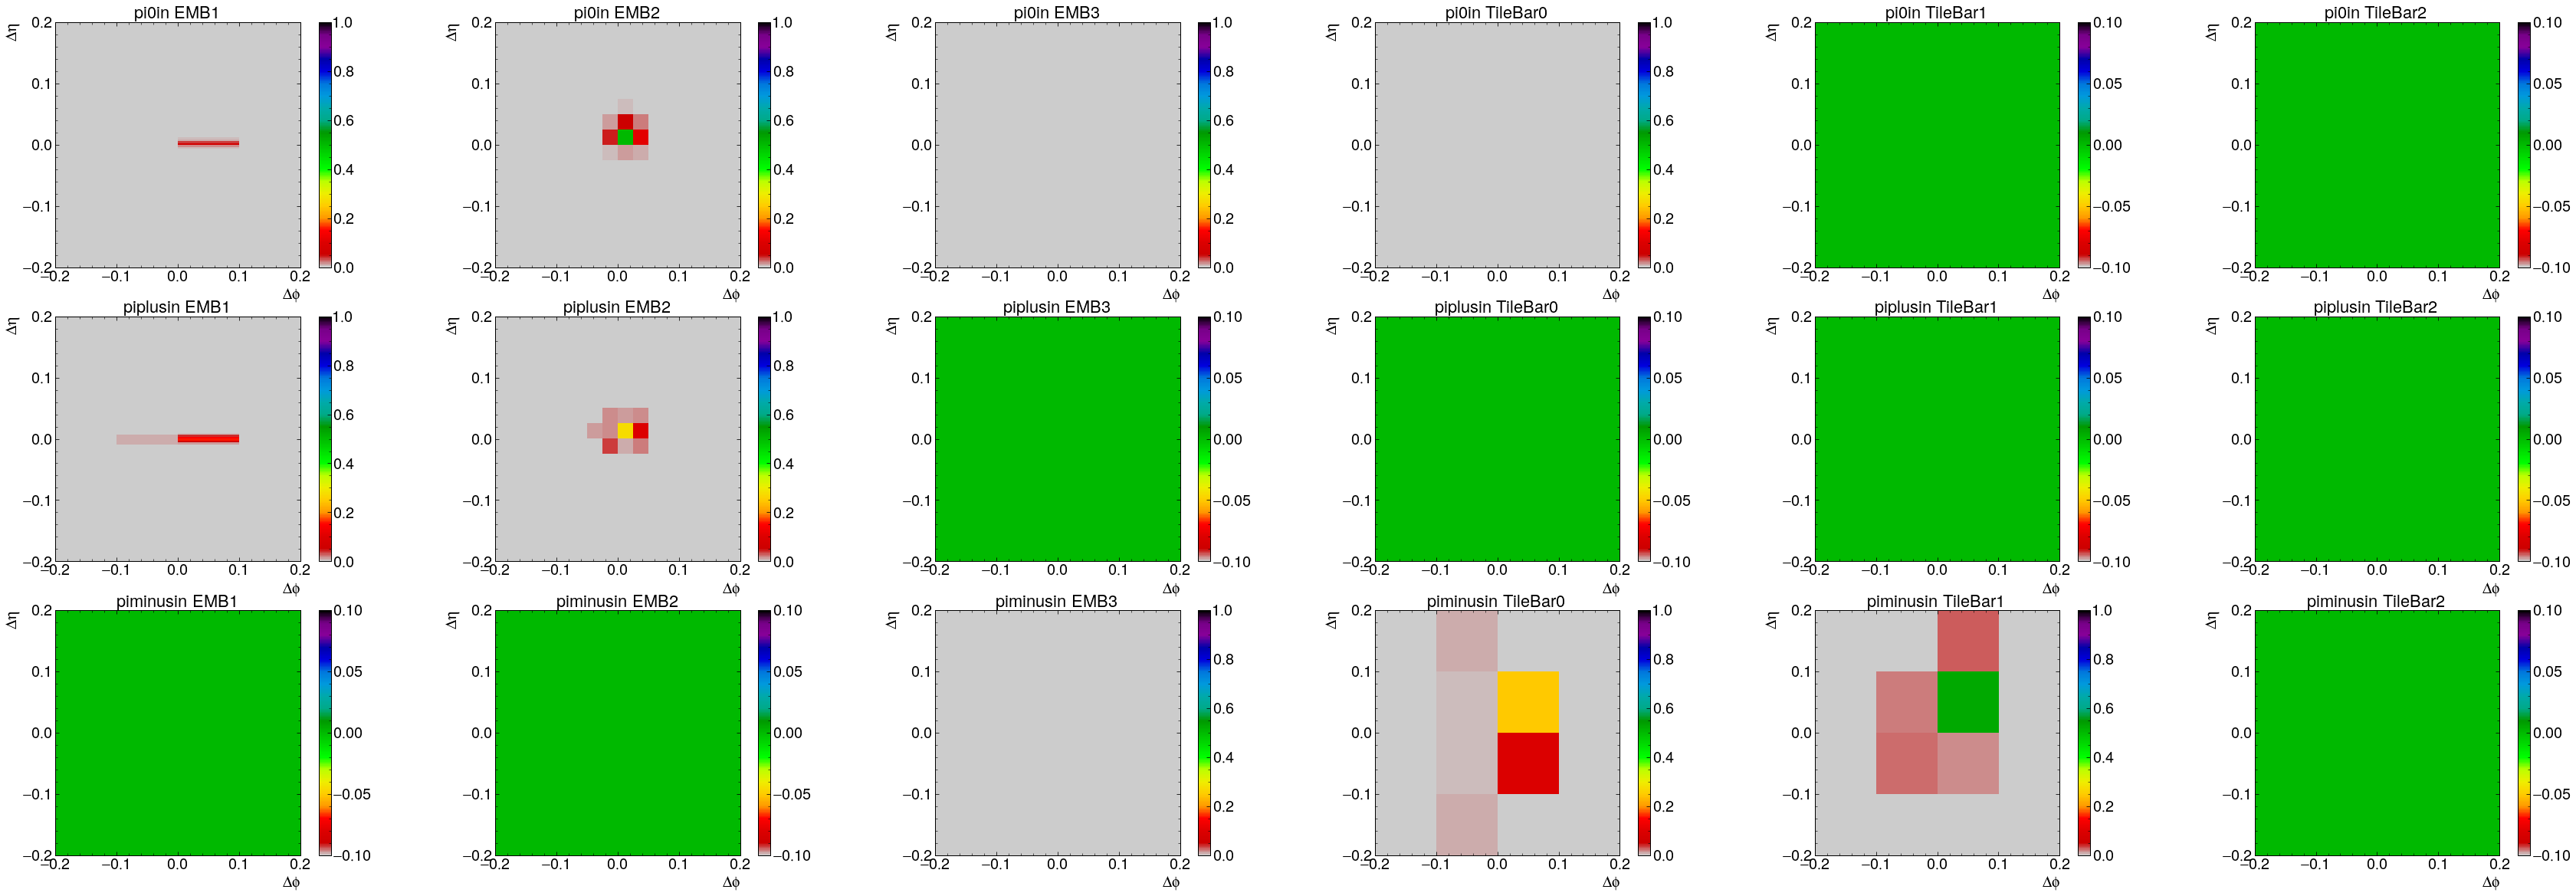

<Figure size 799.992x599.976 with 0 Axes>

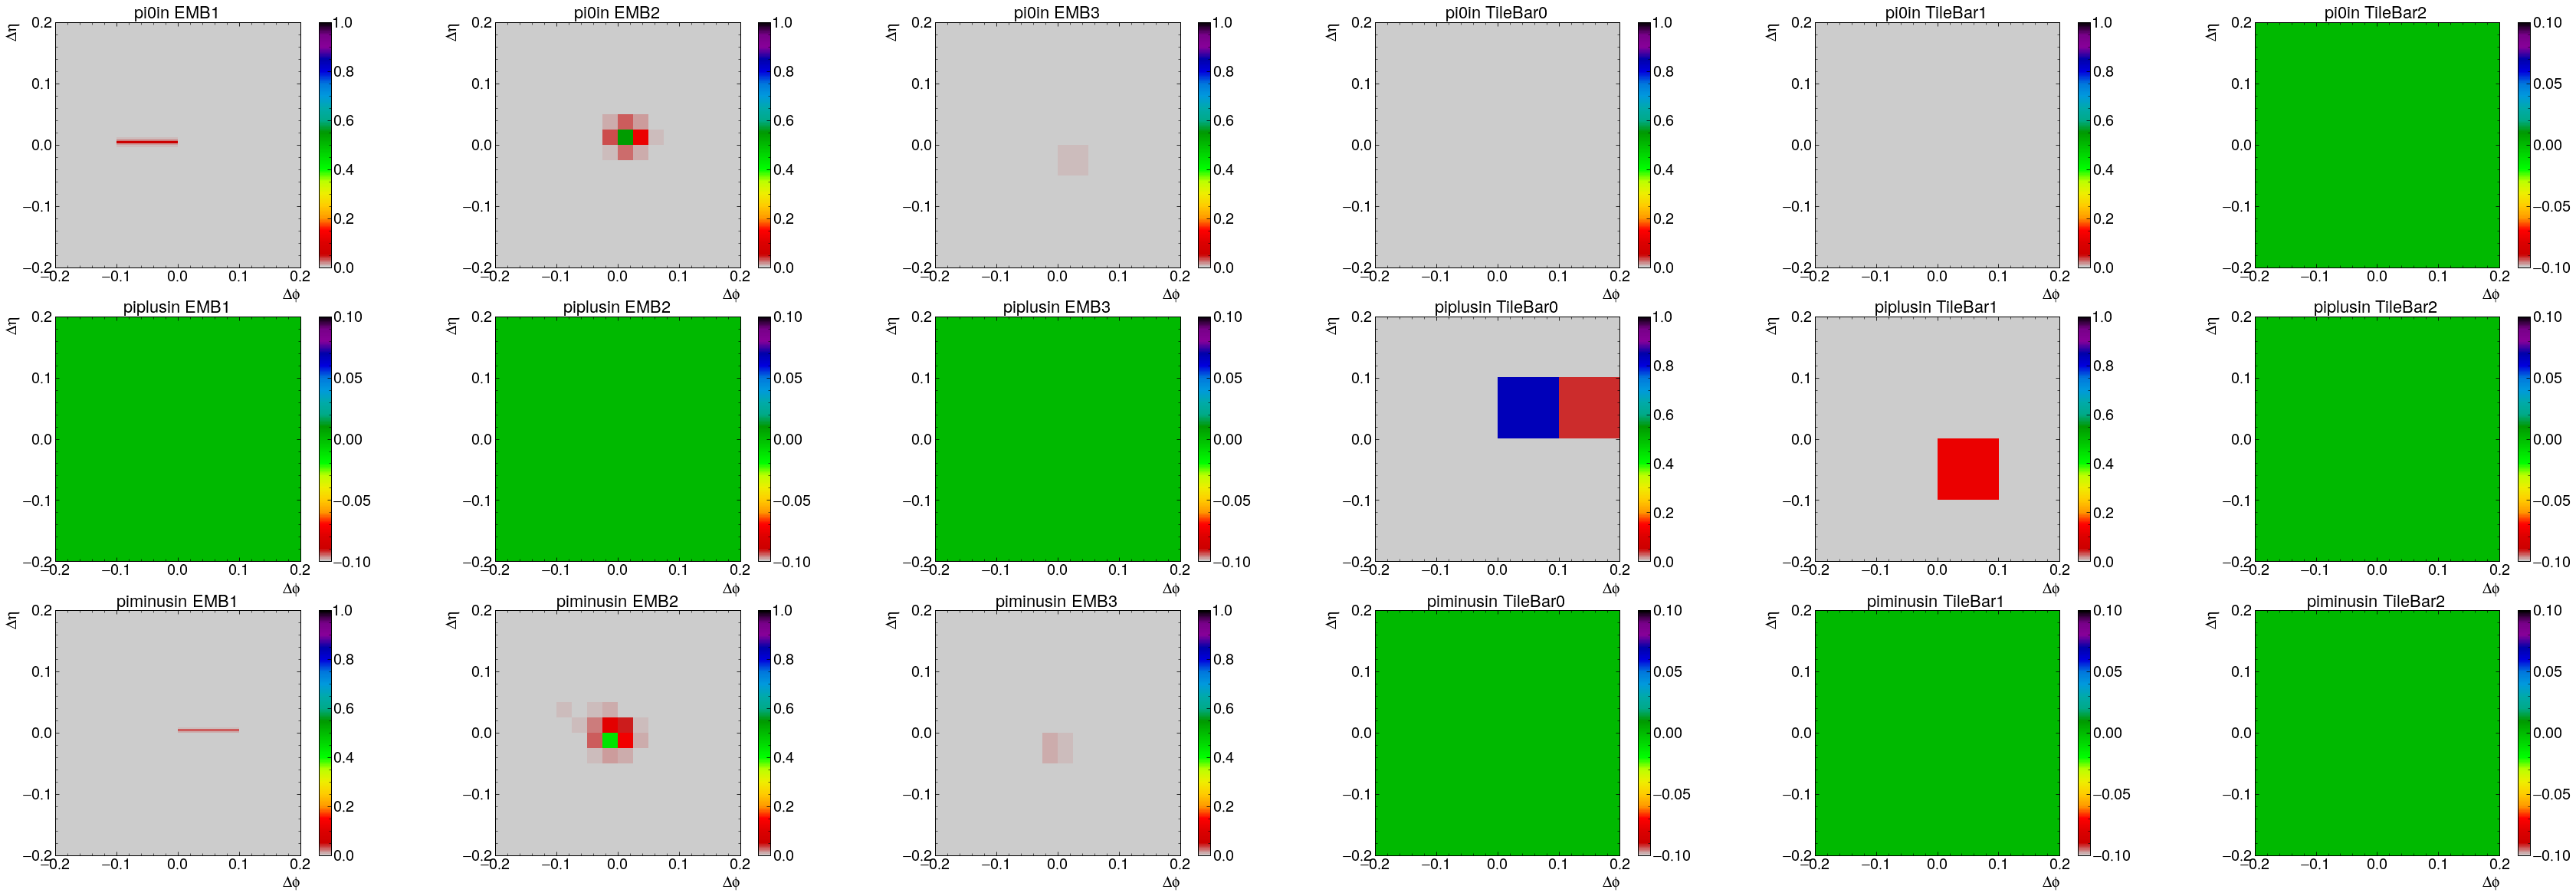

In [53]:
# plot a few different ones each time
clu = np.random.randint(0, 260000, 30)

for cluster in clu:

    # make the plot
    plt.cla(); plt.clf()
    fig = plt.figure(figsize=(60,20))
    fig.patch.set_facecolor('white')

    i = 0
    for ptype, pcell in pcells.items():
        for layer in layers:
            i = i+1
            plt.subplot(3,6,i)
            plt.imshow(pcell[layer][cluster].reshape(cell_shapes[layer]), extent=[-0.2, 0.2, -0.2, 0.2],
                cmap='nipy_spectral_r', origin='lower', interpolation='nearest')
            if np.mean(pcell[layer][cluster]) > 0.:
                plt.clim(0,1.) #this works to set them all to the same range, except for true zeros -> green!
            plt.colorbar()#I think this is a good color, lots of distinction and all same range, easy to tell zero
            plt.title(ptype+ 'in '+str(layer))#outliers with counts >1 are rare
            ampl.set_xlabel("$\Delta\phi$")
            ampl.set_ylabel("$\Delta\eta$")

    # show the plots
    plt.show()